## Importing libraries and dataset

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from scipy.stats import norm
from scipy.stats import skew
import warnings
warnings.filterwarnings("ignore")

In [14]:
df = pd.read_csv('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv')
df.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

### Dropping EmpNumber column , getting the shape and information 

In [3]:
df1 = df.drop(['EmpNumber'],axis=1,inplace=True)

In [5]:
df.shape

(1200, 27)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1200 non-null   int64 
 1   Gender                        1200 non-null   object
 2   EducationBackground           1200 non-null   object
 3   MaritalStatus                 1200 non-null   object
 4   EmpDepartment                 1200 non-null   object
 5   EmpJobRole                    1200 non-null   object
 6   BusinessTravelFrequency       1200 non-null   object
 7   DistanceFromHome              1200 non-null   int64 
 8   EmpEducationLevel             1200 non-null   int64 
 9   EmpEnvironmentSatisfaction    1200 non-null   int64 
 10  EmpHourlyRate                 1200 non-null   int64 
 11  EmpJobInvolvement             1200 non-null   int64 
 12  EmpJobLevel                   1200 non-null   int64 
 13  EmpJobSatisfaction

In [9]:
# seperating columns with categorical and numerical values
categorical, numerical = [],[]
for z in df.columns:
    t = df.dtypes[z]
    if t=='object':
        categorical.append(z)
    else:
        numerical.append(z)
print("CategoricaL are ---->",categorical,end="")
print()
print()
print("NumericaL are ---->",numerical,end="")
print()
print("total categorical features = ",len(categorical))
print('total numerical features = ',len(numerical))

CategoricaL are ----> ['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']

NumericaL are ----> ['Age', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating']
total categorical features =  8
total numerical features =  19


## Getting unique values of each feature

In [11]:
df.EducationBackground.unique()

array(['Marketing', 'Life Sciences', 'Human Resources', 'Medical',
       'Other', 'Technical Degree'], dtype=object)

In [11]:
df.EmpDepartment.unique()

array(['Sales', 'Human Resources', 'Development', 'Data Science',
       'Research & Development', 'Finance'], dtype=object)

In [12]:
df.EmpJobRole.unique()

array(['Sales Executive', 'Manager', 'Developer', 'Sales Representative',
       'Human Resources', 'Senior Developer', 'Data Scientist',
       'Senior Manager R&D', 'Laboratory Technician',
       'Manufacturing Director', 'Research Scientist',
       'Healthcare Representative', 'Research Director', 'Manager R&D',
       'Finance Manager', 'Technical Architect', 'Business Analyst',
       'Technical Lead', 'Delivery Manager'], dtype=object)

In [13]:
df.BusinessTravelFrequency.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [14]:
df.OverTime.unique()

array(['No', 'Yes'], dtype=object)

In [15]:
df.Attrition.unique()

array(['No', 'Yes'], dtype=object)

In [16]:
df.Attrition.value_counts()

No     1022
Yes     178
Name: Attrition, dtype: int64

In [17]:
df.PerformanceRating.unique()

array([3, 4, 2], dtype=int64)

In [18]:
df.PerformanceRating.value_counts()

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64

In [20]:
df.Gender.value_counts()

Male      725
Female    475
Name: Gender, dtype: int64

In [31]:
df.EmpDepartment.value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

In [40]:
df.Age.min()

18

In [41]:
df.Age.max()

60

In [9]:
df.DistanceFromHome.min()

1

In [11]:
df.DistanceFromHome.max()

29

# Analayzing data using graphs
## Relation between various predictors and target

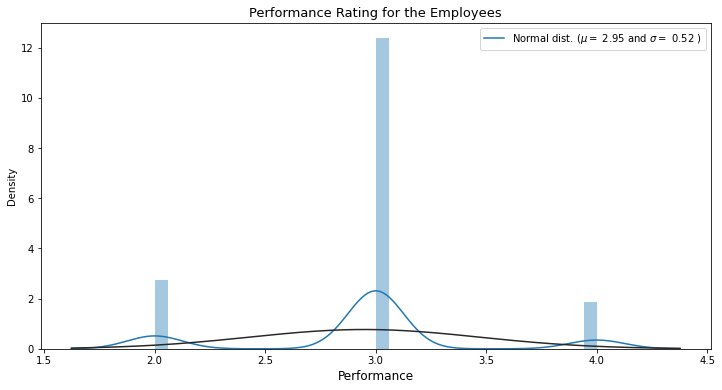

In [19]:
(mu, sigma) = norm.fit(df.PerformanceRating)
plt.figure(figsize = (12,6))
sns.distplot(df.PerformanceRating, kde = True, hist=True, fit = norm)
plt.title('Performance Rating for the Employees', fontsize = 13)
plt.xlabel("Performance", fontsize = 12)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
           loc='best')
plt.show()

<AxesSubplot:xlabel='EmpDepartment', ylabel='PerformanceRating'>

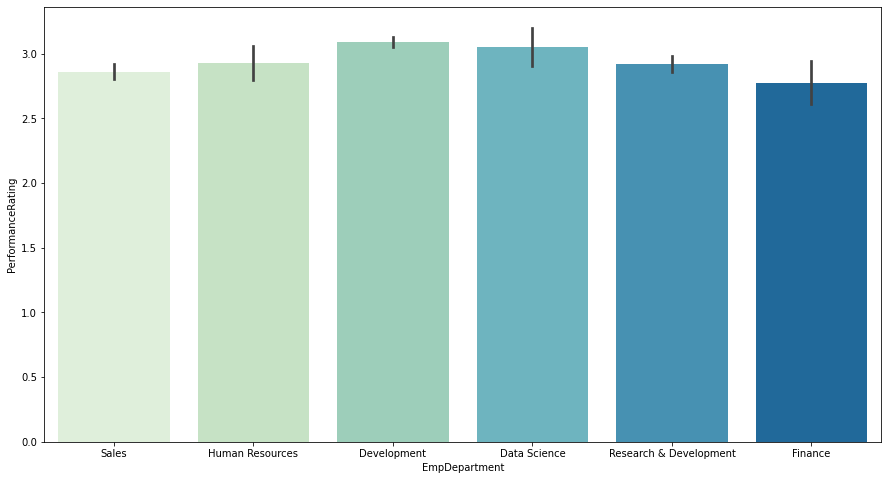

In [20]:
plt.figure(figsize=(15,8))
sns.barplot(x=df.EmpDepartment,y=df.PerformanceRating, palette = "GnBu")

<AxesSubplot:xlabel='EmpJobSatisfaction', ylabel='PerformanceRating'>

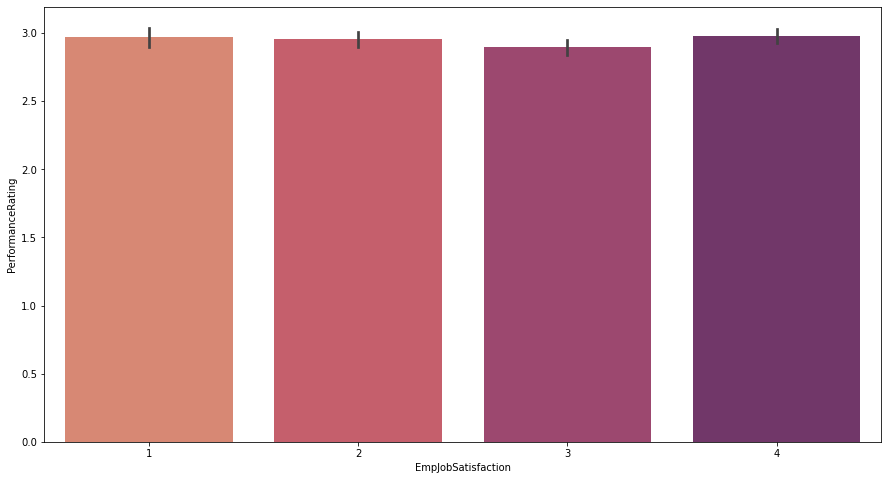

In [15]:
plt.figure(figsize=(15,8))
sns.barplot(x=df.EmpJobSatisfaction,y=df.PerformanceRating, palette = "flare")

<AxesSubplot:xlabel='ExperienceYearsAtThisCompany', ylabel='PerformanceRating'>

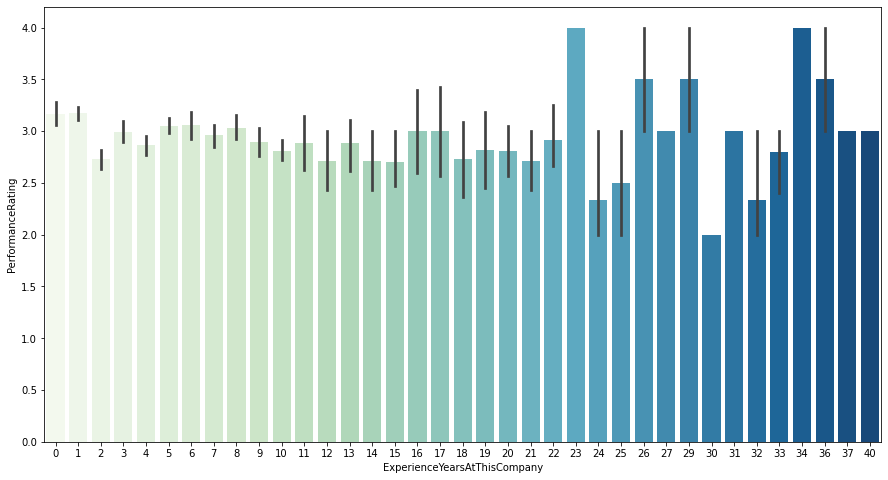

In [8]:
plt.figure(figsize=(15,8))
sns.barplot(x=df.ExperienceYearsAtThisCompany,y=df.PerformanceRating, palette = "GnBu")

<AxesSubplot:xlabel='EmpJobInvolvement', ylabel='PerformanceRating'>

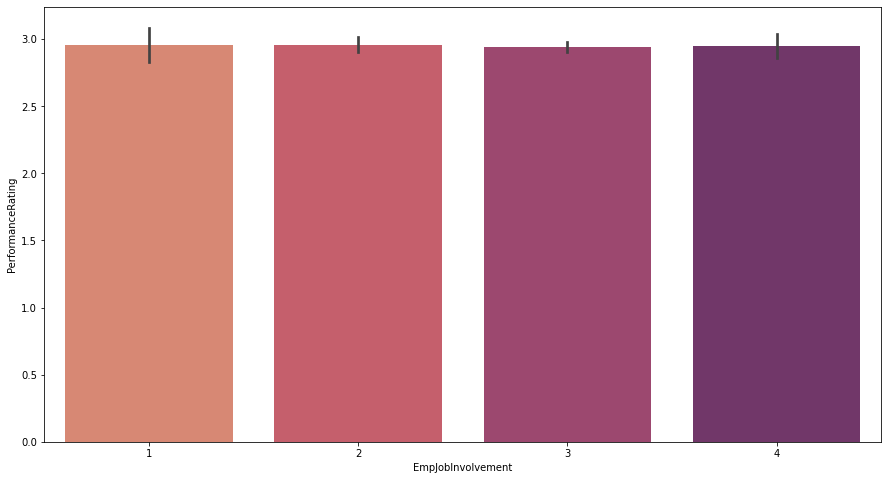

In [16]:
plt.figure(figsize=(15,8))
sns.barplot(x=df.EmpJobInvolvement,y=df.PerformanceRating, palette = "flare")

<AxesSubplot:xlabel='Age', ylabel='PerformanceRating'>

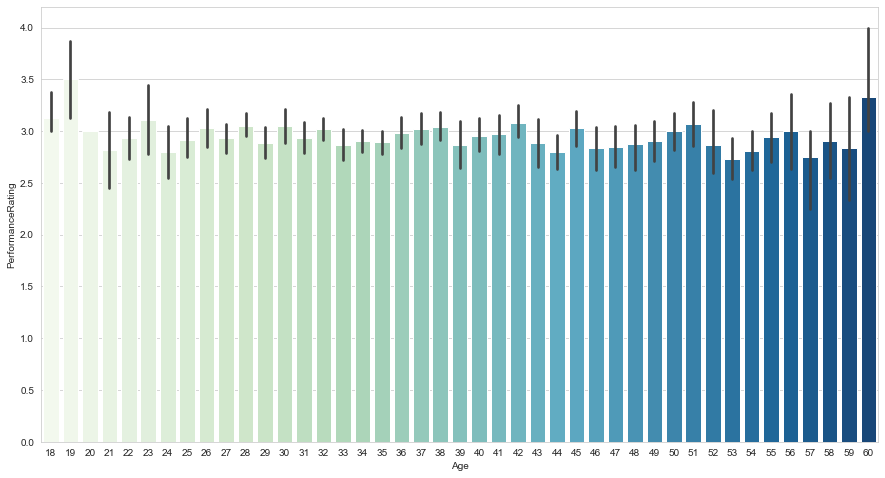

In [22]:
plt.figure(figsize=(15,8))
sns.barplot(x=df.Age,y=(df.PerformanceRating), palette = "GnBu")

<AxesSubplot:xlabel='MaritalStatus', ylabel='PerformanceRating'>

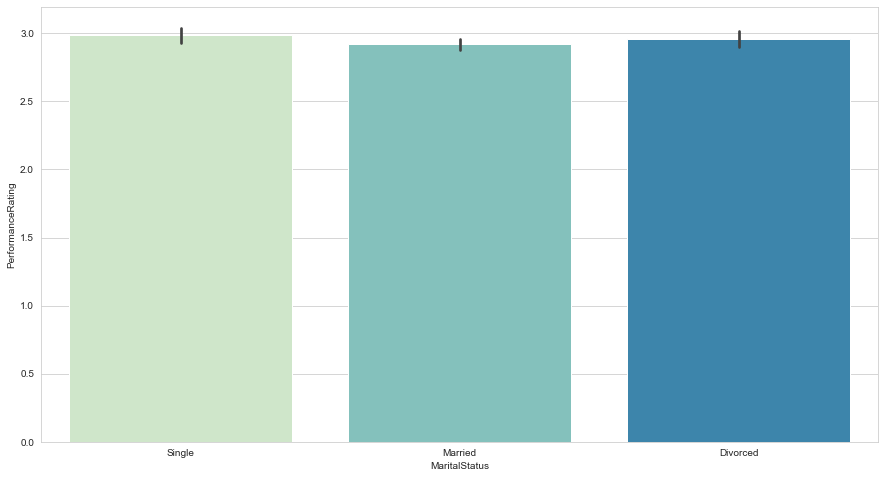

In [52]:
plt.figure(figsize=(15,8))
sns.barplot(x=df.MaritalStatus,y=(df.PerformanceRating), palette = "GnBu")

<AxesSubplot:xlabel='BusinessTravelFrequency', ylabel='PerformanceRating'>

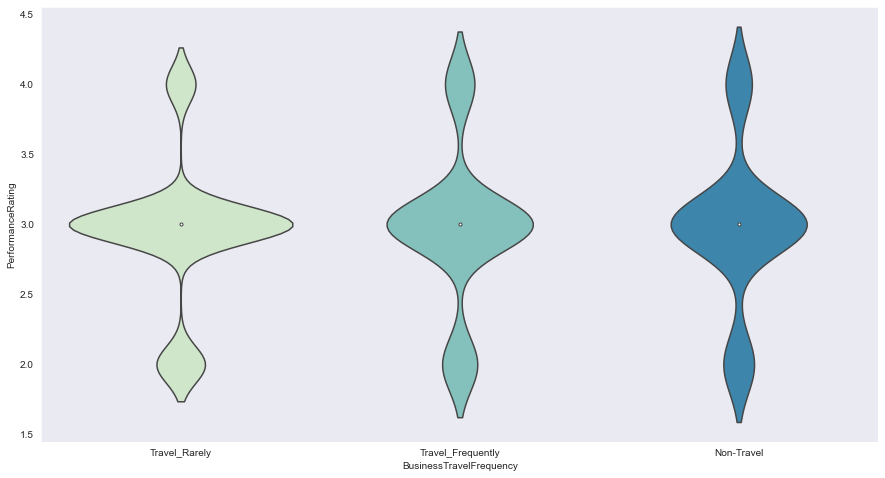

In [11]:
plt.figure(figsize=(15,8))
sns.violinplot(x=df.BusinessTravelFrequency,y=(df.PerformanceRating), palette = "GnBu")

<AxesSubplot:xlabel='EmpEducationLevel', ylabel='PerformanceRating'>

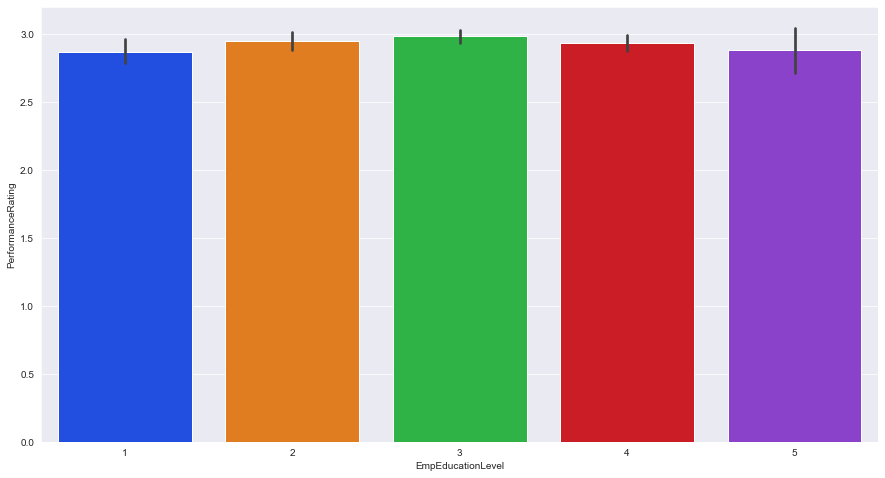

In [7]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
sns.barplot(x=df.EmpEducationLevel,y=(df.PerformanceRating), palette = "bright")

In [8]:
df.EmpEducationLevel.value_counts()

3    449
4    322
2    239
1    148
5     42
Name: EmpEducationLevel, dtype: int64

<AxesSubplot:xlabel='EmpEnvironmentSatisfaction', ylabel='PerformanceRating'>

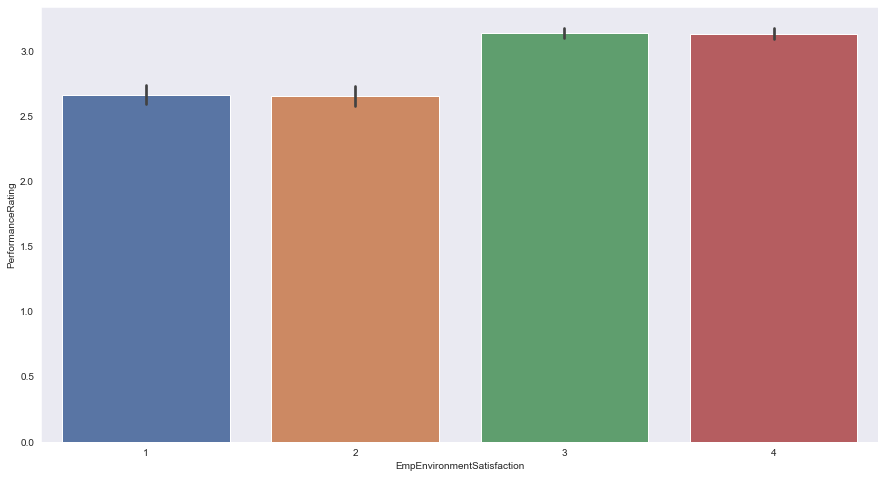

In [9]:
sns.set_style('dark')
plt.figure(figsize=(15,8))
sns.barplot(x=df.EmpEnvironmentSatisfaction,y=(df.PerformanceRating), palette = "deep")

<AxesSubplot:xlabel='EmpHourlyRate', ylabel='PerformanceRating'>

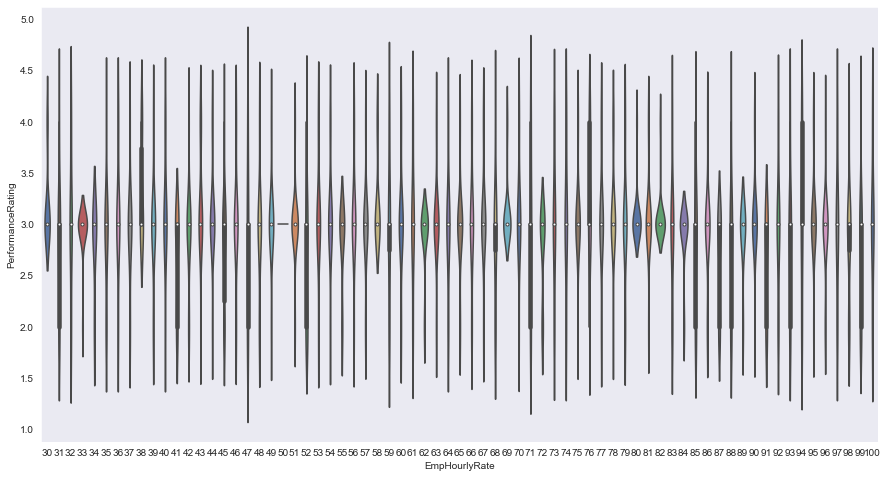

In [10]:
sns.set_style('dark')
plt.figure(figsize=(15,8))
sns.violinplot(x=df.EmpHourlyRate,y=(df.PerformanceRating), palette = "deep")

In [13]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [17]:
import plotly.express as px

fig = px.scatter(df, x="EmpJobInvolvement", y="PerformanceRating",
         size="EmpJobLevel", color="Age",
                 hover_name="EmpJobSatisfaction", log_x=True, size_max=60)
fig.show()

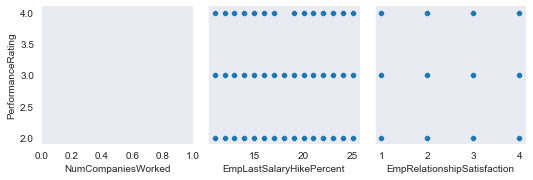

In [23]:

sns.pairplot(
    df,
    x_vars=['NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction'],
    y_vars=["PerformanceRating"],
)


In [25]:
df.NumCompaniesWorked.value_counts()

1    433
0    156
3    133
2    123
4    107
7     60
6     56
5     53
8     40
9     39
Name: NumCompaniesWorked, dtype: int64

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='PerformanceRating'>

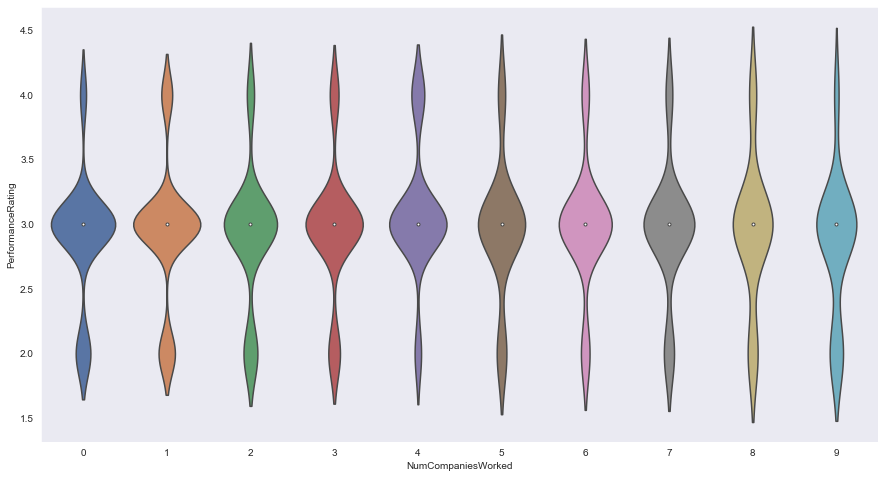

In [27]:
sns.set_style('dark')
plt.figure(figsize=(15,8))
sns.violinplot(x=df.NumCompaniesWorked,y=(df.PerformanceRating), palette = "deep")

## Histogram for numerical variables

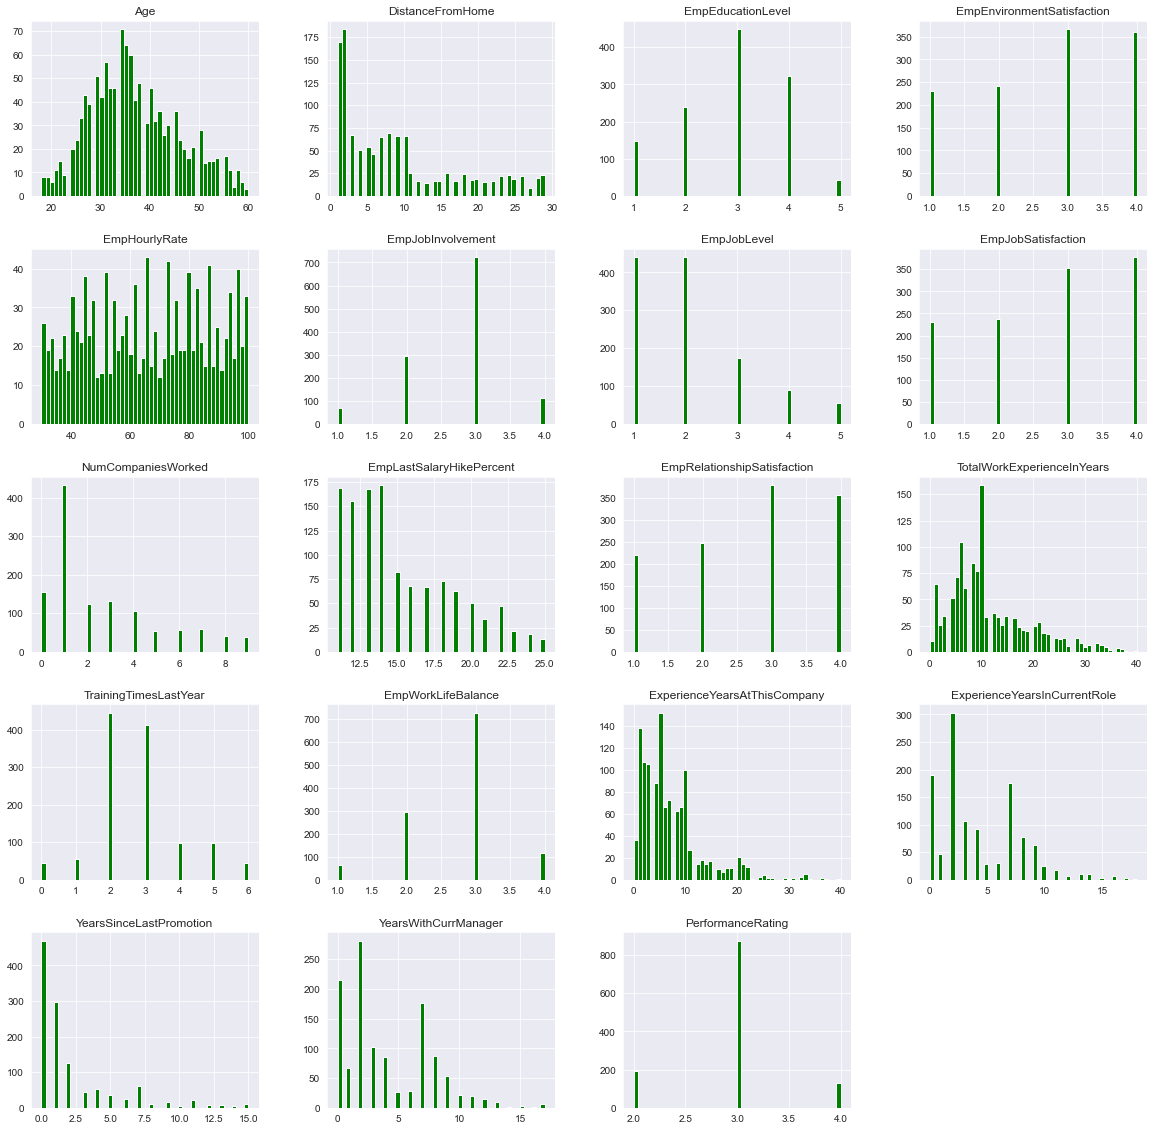

In [29]:
df.hist(column = numerical, bins = 50,figsize=(20,20),color='Green')
plt.show()

## Relation between categorical varaibles with the performance rating

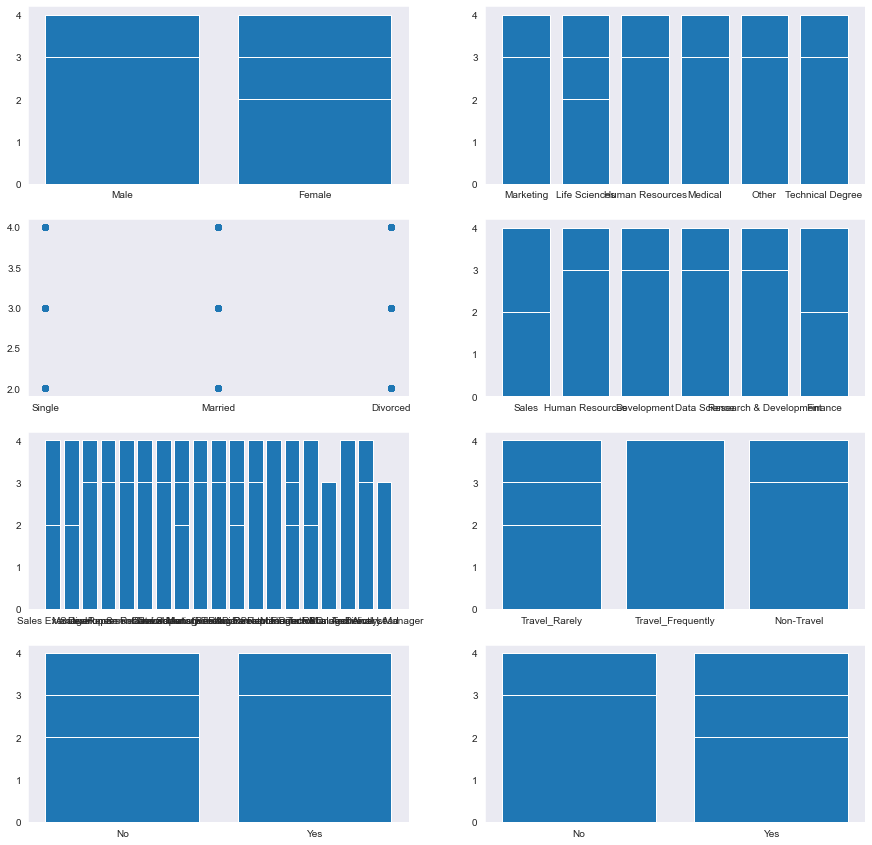

In [32]:
from matplotlib import rcParams
rcParams['figure.figsize']=15,15

fig , ax1 =plt.subplots(4,2)

ax1[0,0].bar(df.Gender,df.PerformanceRating)
ax1[0,1].bar(df.EducationBackground,df.PerformanceRating)
ax1[1,0].scatter(df.MaritalStatus,df.PerformanceRating)
ax1[1,1].bar(df.EmpDepartment,df.PerformanceRating)
ax1[2,0].bar(df.EmpJobRole,df.PerformanceRating)
ax1[2,1].bar(df.BusinessTravelFrequency,df.PerformanceRating)
ax1[3,0].bar(df.OverTime,df.PerformanceRating)
ax1[3,1].bar(df.Attrition,df.PerformanceRating)

plt.show()

## Performance based on gender

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

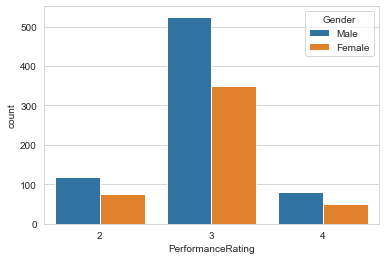

In [41]:
sns.set_style('whitegrid')
sns.countplot(x='PerformanceRating', hue=df.Gender,data = df)

<AxesSubplot:xlabel='PerformanceRating', ylabel='Gender'>

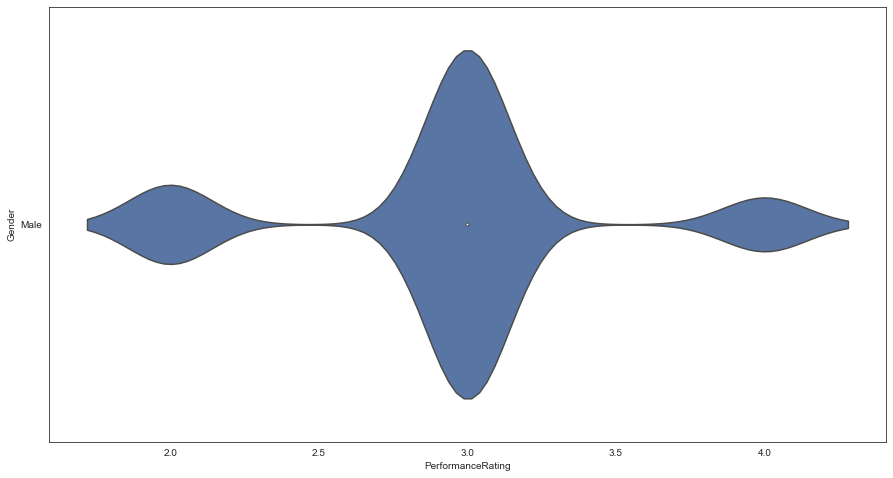

In [38]:
sns.set_style('white')
plt.figure(figsize=(15,8))
sns.violinplot(y=df1.Gender,x=(df.PerformanceRating), palette = "deep")

In [39]:
df2 = df[df.Gender=='Female']
df2.shape

(475, 27)

<AxesSubplot:xlabel='PerformanceRating', ylabel='Gender'>

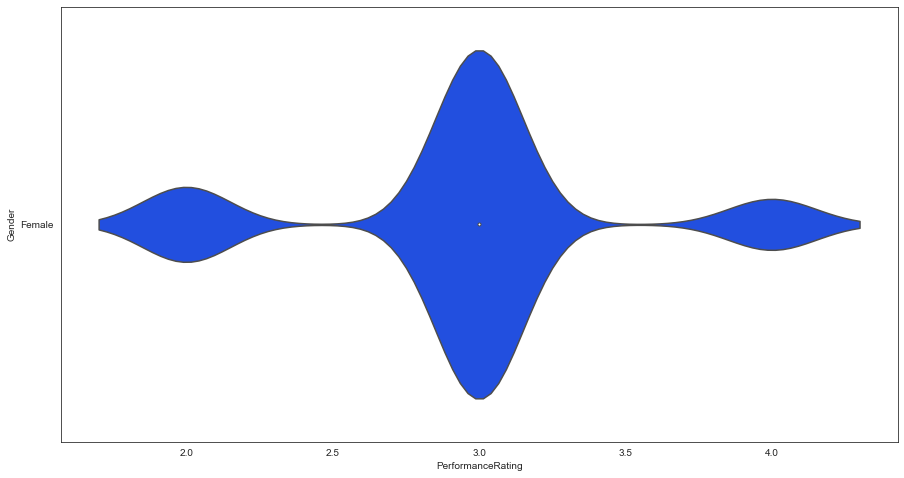

In [40]:
sns.set_style('white')
plt.figure(figsize=(15,8))
sns.violinplot(y=df2.Gender,x=(df.PerformanceRating), palette = "bright")

# Analyzing department wise performance

In [21]:
sales = df[df.EmpDepartment=='Sales']
HR = df[df.EmpDepartment=='Human Resources']
DataScience = df[df.EmpDepartment=='Data Science']
RD = df[df.EmpDepartment=='Research & Development']
Development = df[df.EmpDepartment=='Development']
Finance = df[df.EmpDepartment=='Finance']

# Sales

In [20]:
sales

EmpNumber  Age  Gender EducationBackground MaritalStatus EmpDepartment  \
0     E1001000   32    Male           Marketing        Single         Sales   
1     E1001006   47    Male           Marketing        Single         Sales   
2     E1001007   40    Male       Life Sciences       Married         Sales   
4     E1001010   60    Male           Marketing        Single         Sales   
6     E1001016   50    Male           Marketing       Married         Sales   
...        ...  ...     ...                 ...           ...           ...   
1191   E100985   25    Male       Life Sciences       Married         Sales   
1192   E100987   38  Female           Marketing        Single         Sales   
1194   E100990   48    Male           Marketing       Married         Sales   
1195   E100992   27  Female             Medical      Divorced         Sales   
1199   E100998   24  Female       Life Sciences        Single         Sales   

                EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0          Sales Executive           Travel_Rarely                10   
1          Sales Executive           Travel_Rarely                14   
2          Sales Executive       Travel_Frequently                 5   
4          Sales Executive           Travel_Rarely                16   
6     Sales Representative           Travel_Rarely                 8   
...                    ...                     ...               ...   
1191       Sales Executive           Travel_Rarely                 8   
1192       Sales Executive           Travel_Rarely                 7   
1194       Sales Executive           Travel_Rarely                 2   
1195       Sales Executive       Travel_Frequently                 3   
1199       Sales Executive           Travel_Rarely                 3   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                     3  ...                            4   
1                     4  ...                            4   
2                     4  ...                            3   
4                     4  ...                            4   
6                     4  ...                            4   
...                 ...  ...                          ...   
1191                  3  ...                            3   
1192                  4  ...                            1   
1194                  1  ...                            4   
1195                  1  ...                            2   
1199                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                             10                      2                   2   
1                             20                      2                   3   
2                             20                      2                   3   
4                             10                      1                   3   
6                              4                      2                   3   
...                          ...                    ...                 ...   
1191                           4                      4                   3   
1192                           8                      2                   3   
1194                          12                      3                   3   
1195                           6                      3                   3   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                               10                             7   
1                                7                             7   
2                               18                            13   
4                                2                             2   
6                                2                             2   
...                            ...                           ...   
1191                             

<AxesSubplot:xlabel='Age', ylabel='PerformanceRating'>

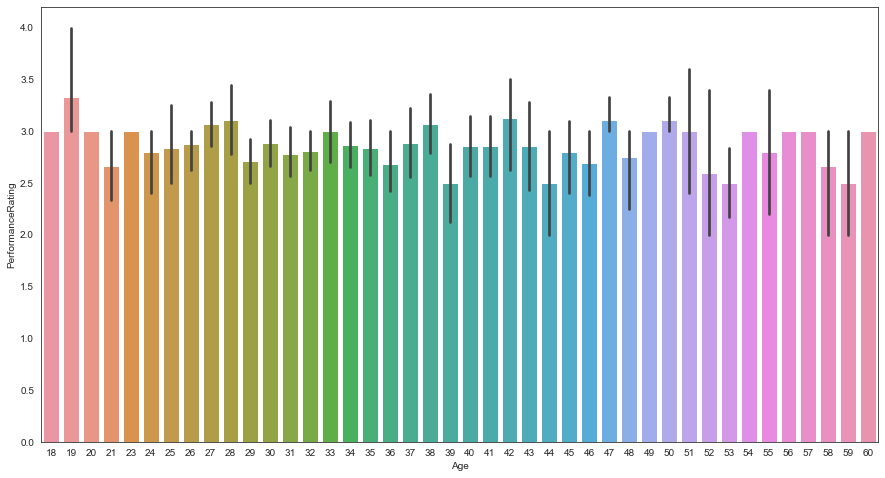

In [78]:
plt.figure(figsize=(15,8))
sns.barplot(y=sales.PerformanceRating,x=sales.Age)

<AxesSubplot:xlabel='Gender', ylabel='PerformanceRating'>

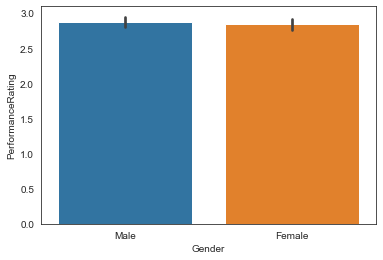

In [81]:
#plt.figure(figsize=(15,8))
sns.barplot(y=sales.PerformanceRating,x=sales.Gender)

<AxesSubplot:xlabel='EmpJobSatisfaction', ylabel='PerformanceRating'>

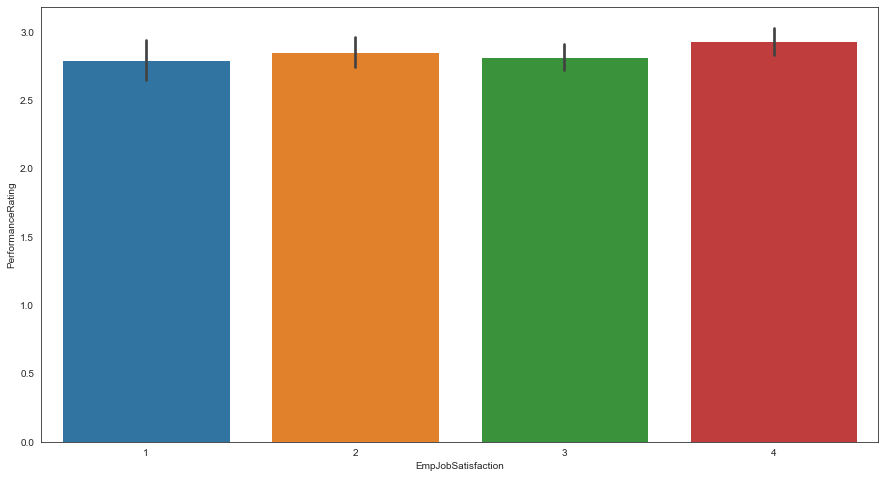

In [82]:
plt.figure(figsize=(15,8))
sns.barplot(y=sales.PerformanceRating,x=sales.EmpJobSatisfaction)

<AxesSubplot:xlabel='EmpRelationshipSatisfaction', ylabel='PerformanceRating'>

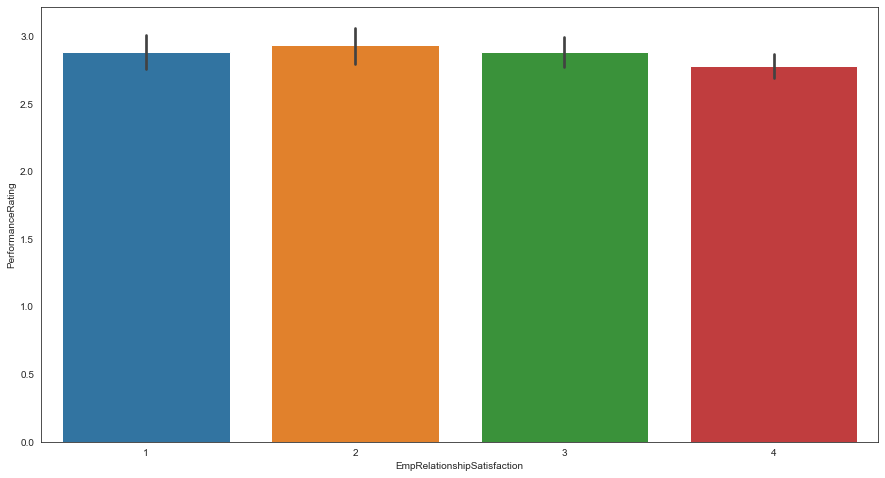

In [84]:
plt.figure(figsize=(15,8))
sns.barplot(y=sales.PerformanceRating,x=sales.EmpRelationshipSatisfaction)

<AxesSubplot:xlabel='EmpWorkLifeBalance', ylabel='PerformanceRating'>

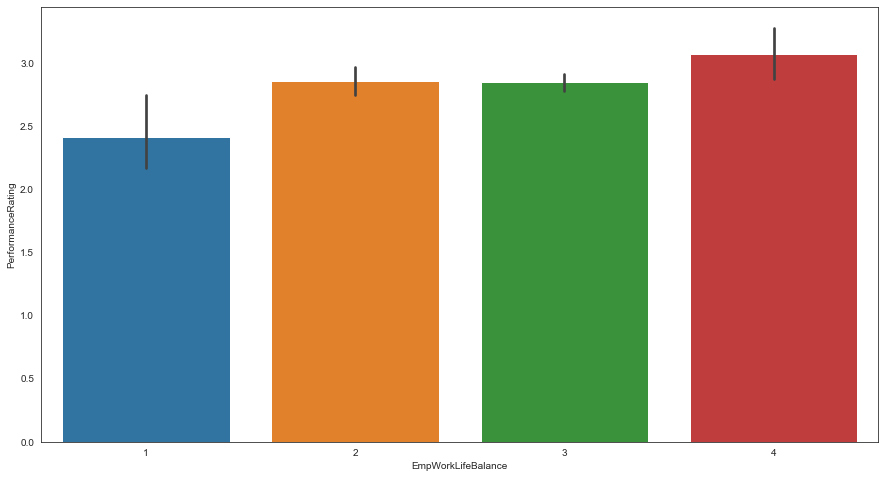

In [86]:
plt.figure(figsize=(15,8))
sns.barplot(y=sales.PerformanceRating,x=sales.EmpWorkLifeBalance)

<AxesSubplot:xlabel='BusinessTravelFrequency', ylabel='PerformanceRating'>

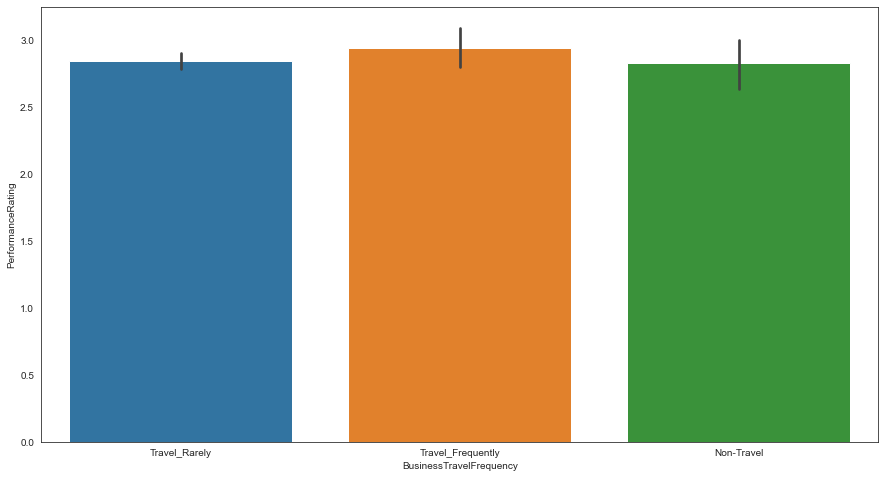

In [87]:
plt.figure(figsize=(15,8))
sns.barplot(y=sales.PerformanceRating,x=sales.BusinessTravelFrequency)

<AxesSubplot:xlabel='MaritalStatus', ylabel='PerformanceRating'>

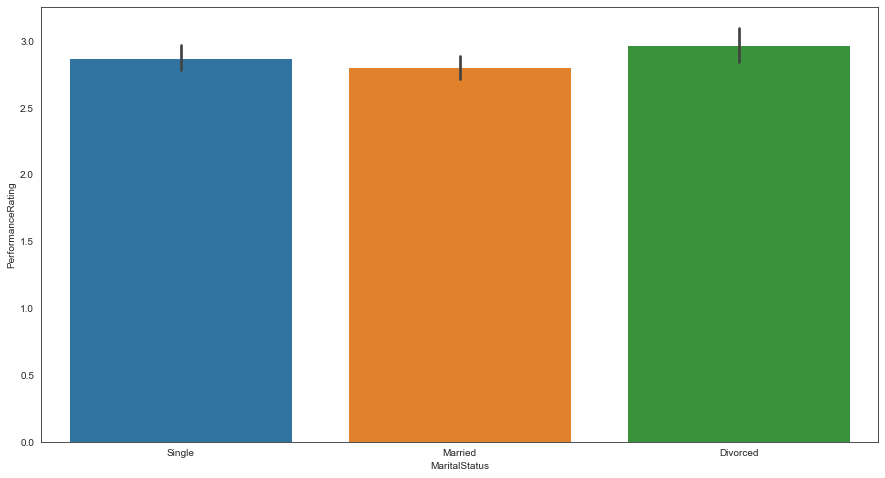

In [88]:
plt.figure(figsize=(15,8))
sns.barplot(y=sales.PerformanceRating,x=sales.MaritalStatus)

<AxesSubplot:xlabel='OverTime', ylabel='PerformanceRating'>

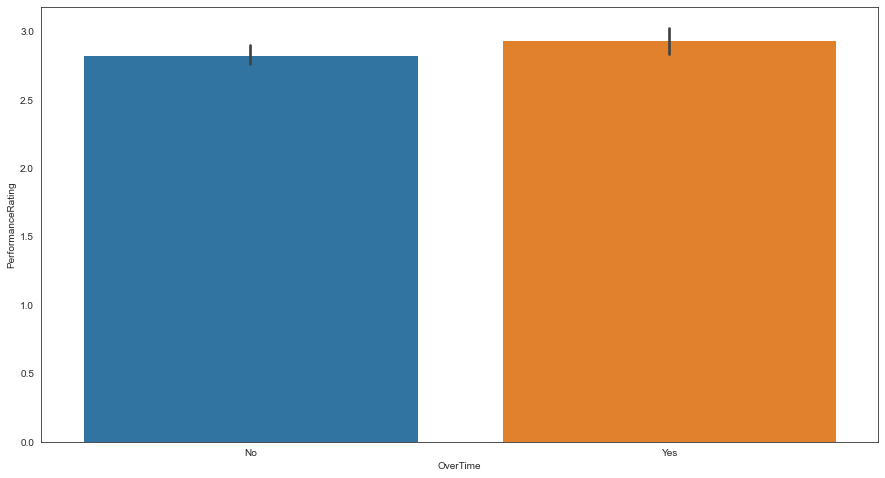

In [89]:
plt.figure(figsize=(15,8))
sns.barplot(y=sales.PerformanceRating,x=sales.OverTime)

In [108]:
sales.OverTime.value_counts()

No     265
Yes    108
Name: OverTime, dtype: int64

<AxesSubplot:xlabel='DistanceFromHome', ylabel='PerformanceRating'>

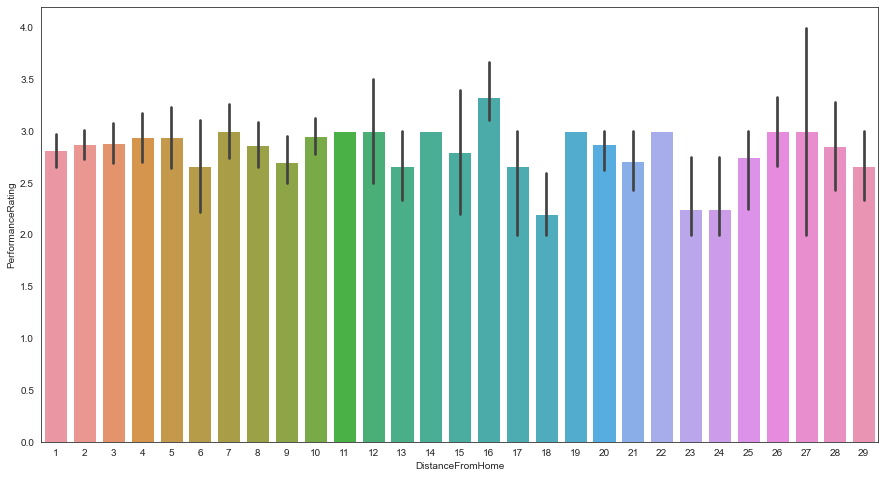

In [90]:
plt.figure(figsize=(15,8))
sns.barplot(y=sales.PerformanceRating,x=sales.DistanceFromHome)

<AxesSubplot:xlabel='EmpEducationLevel', ylabel='PerformanceRating'>

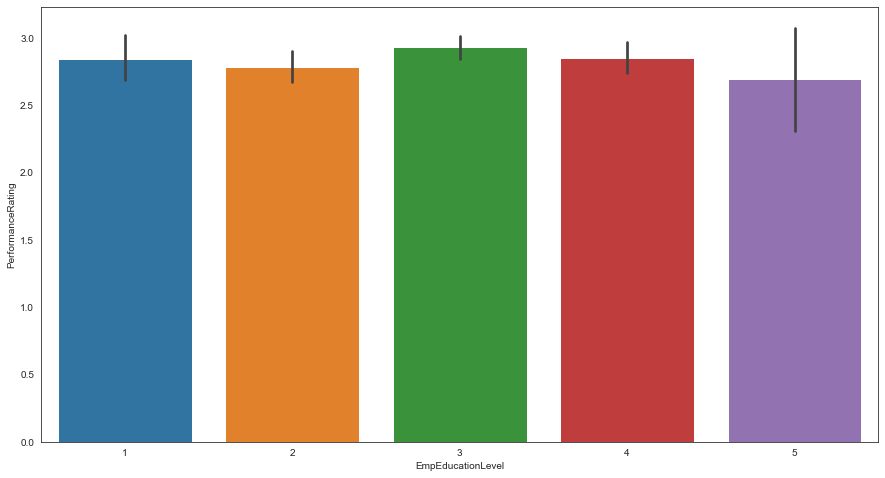

In [91]:
plt.figure(figsize=(15,8))
sns.barplot(y=sales.PerformanceRating,x=sales.EmpEducationLevel)

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='PerformanceRating'>

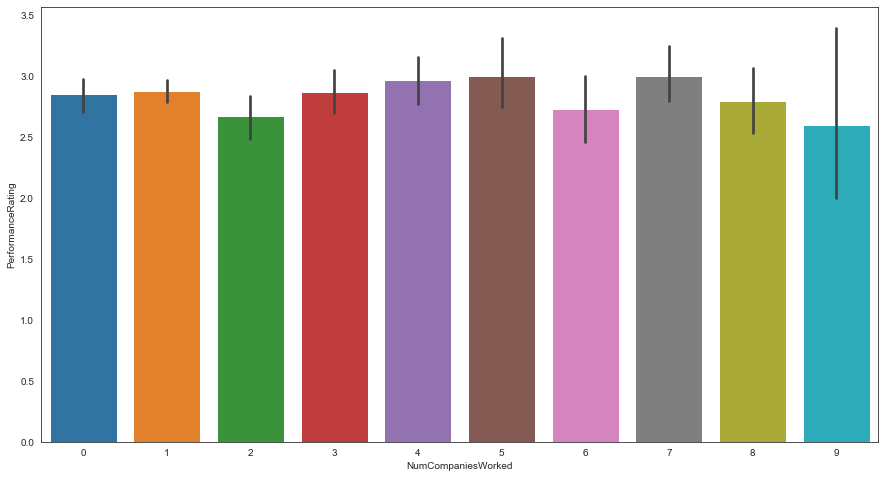

In [92]:
plt.figure(figsize=(15,8))
sns.barplot(y=sales.PerformanceRating,x=sales.NumCompaniesWorked)

<AxesSubplot:xlabel='EmpLastSalaryHikePercent', ylabel='PerformanceRating'>

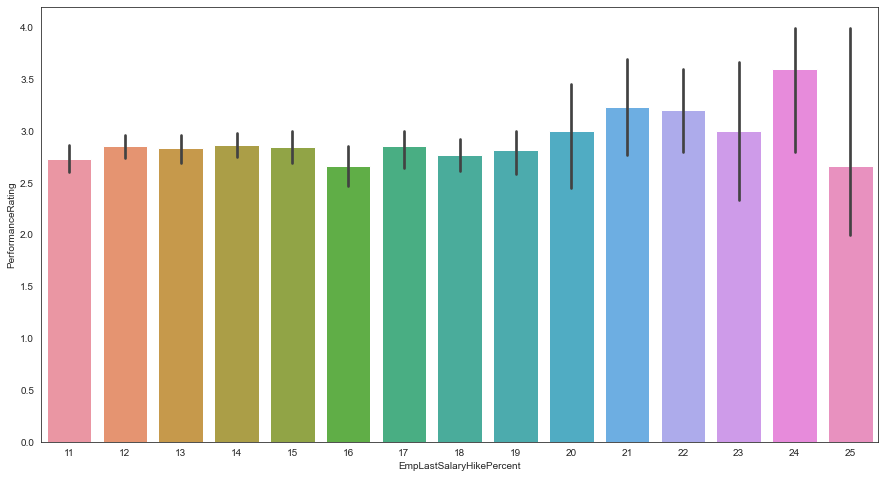

In [93]:
plt.figure(figsize=(15,8))
sns.barplot(y=sales.PerformanceRating,x=sales.EmpLastSalaryHikePercent)

In [96]:
sales.EmpLastSalaryHikePercent.value_counts()

14    59
11    53
12    50
13    49
18    26
15    26
19    22
16    21
22    15
17    14
21    13
20    11
23     6
24     5
25     3
Name: EmpLastSalaryHikePercent, dtype: int64

<AxesSubplot:xlabel='ExperienceYearsInCurrentRole', ylabel='PerformanceRating'>

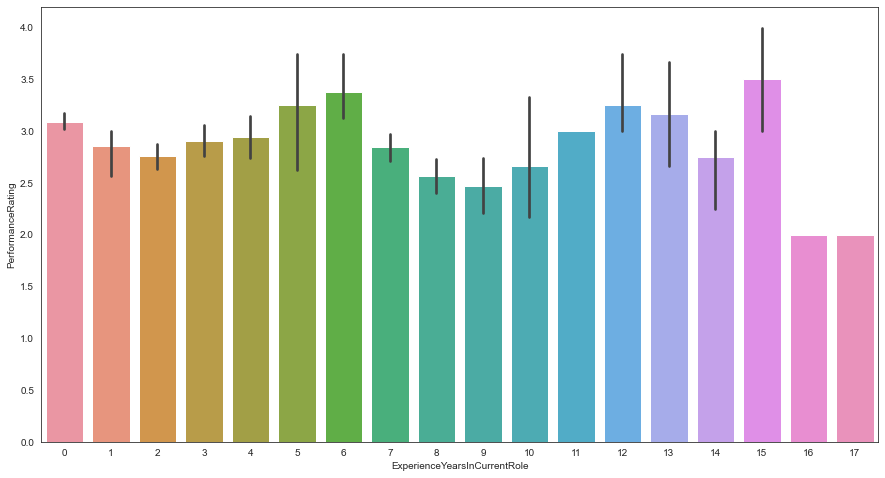

In [97]:
plt.figure(figsize=(15,8))
sns.barplot(y=sales.PerformanceRating,x=sales.ExperienceYearsInCurrentRole)

# HR

<AxesSubplot:xlabel='EmpWorkLifeBalance', ylabel='PerformanceRating'>

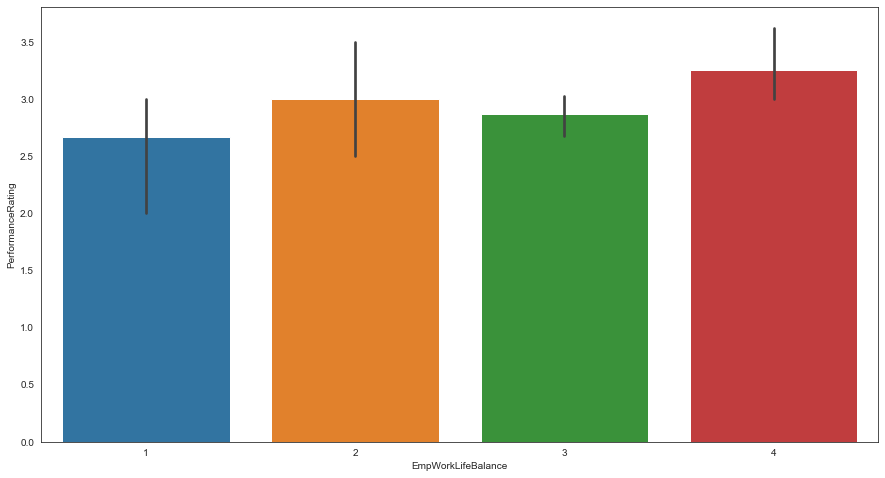

In [99]:
plt.figure(figsize=(15,8))
sns.barplot(y=HR.PerformanceRating,x=HR.EmpWorkLifeBalance)

<AxesSubplot:xlabel='Gender', ylabel='PerformanceRating'>

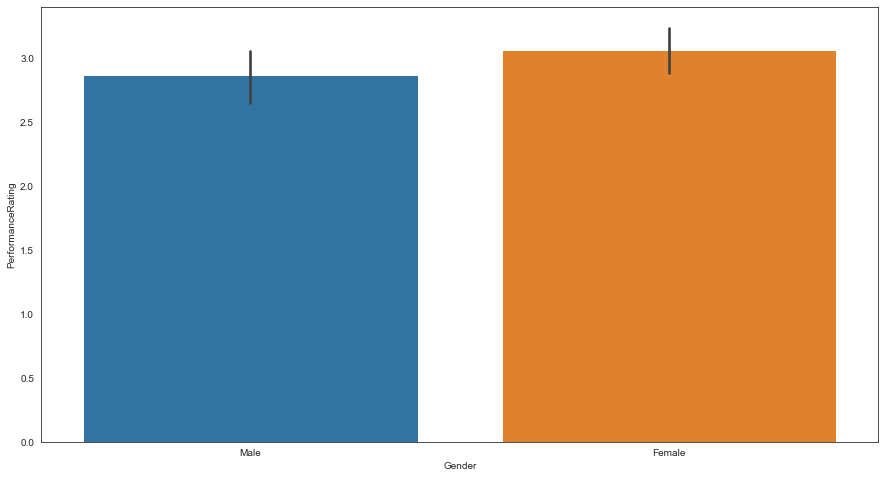

In [100]:
plt.figure(figsize=(15,8))
sns.barplot(y=HR.PerformanceRating,x=HR.Gender)

In [101]:
HR.Gender.value_counts()

Male      37
Female    17
Name: Gender, dtype: int64

<AxesSubplot:xlabel='EmpJobSatisfaction', ylabel='PerformanceRating'>

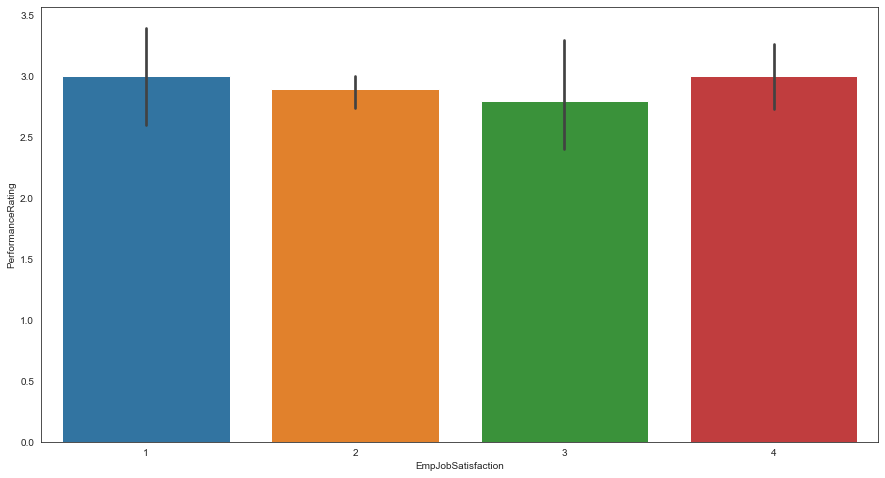

In [102]:
plt.figure(figsize=(15,8))
sns.barplot(y=HR.PerformanceRating,x=HR.EmpJobSatisfaction)

<AxesSubplot:xlabel='MaritalStatus', ylabel='PerformanceRating'>

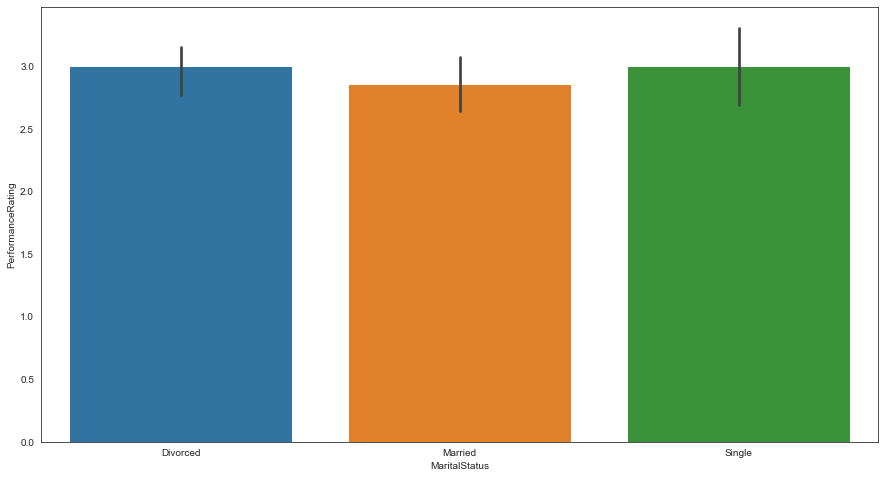

In [103]:
plt.figure(figsize=(15,8))
sns.barplot(y=HR.PerformanceRating,x=HR.MaritalStatus)

<AxesSubplot:xlabel='BusinessTravelFrequency', ylabel='PerformanceRating'>

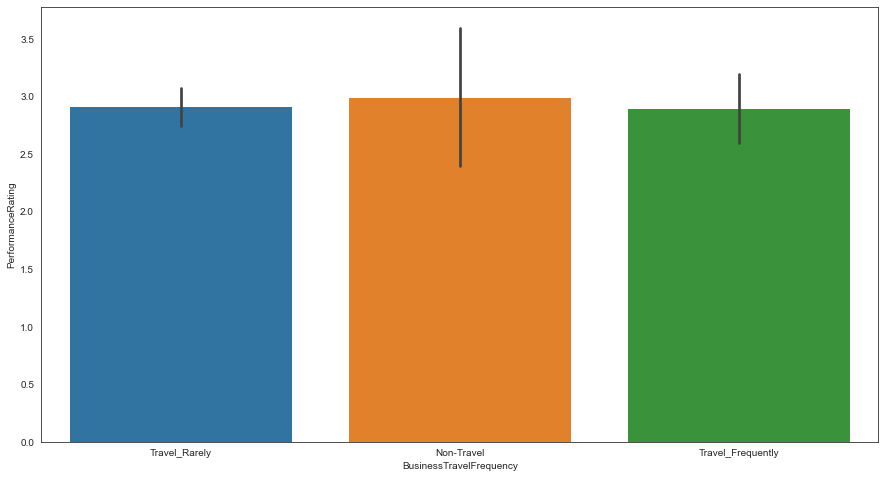

In [104]:
plt.figure(figsize=(15,8))
sns.barplot(y=HR.PerformanceRating,x=HR.BusinessTravelFrequency)

<AxesSubplot:xlabel='EmpLastSalaryHikePercent', ylabel='PerformanceRating'>

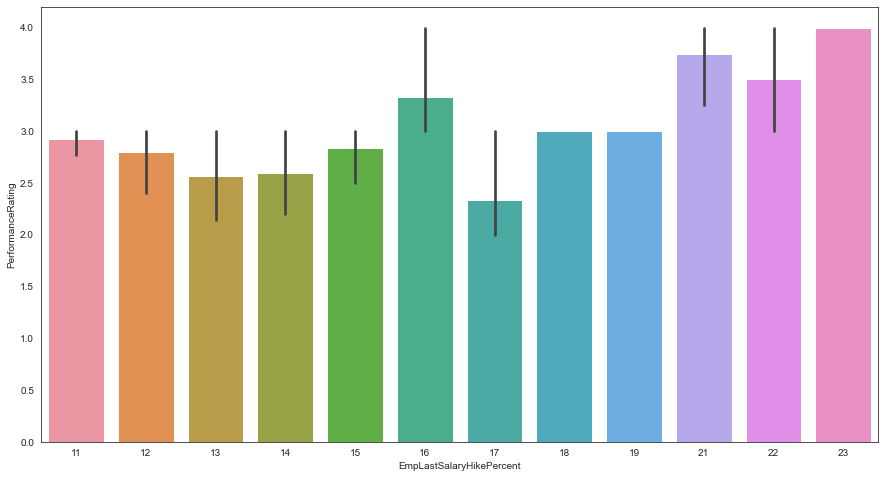

In [105]:
plt.figure(figsize=(15,8))
sns.barplot(y=HR.PerformanceRating,x=HR.EmpLastSalaryHikePercent)

<AxesSubplot:xlabel='OverTime', ylabel='PerformanceRating'>

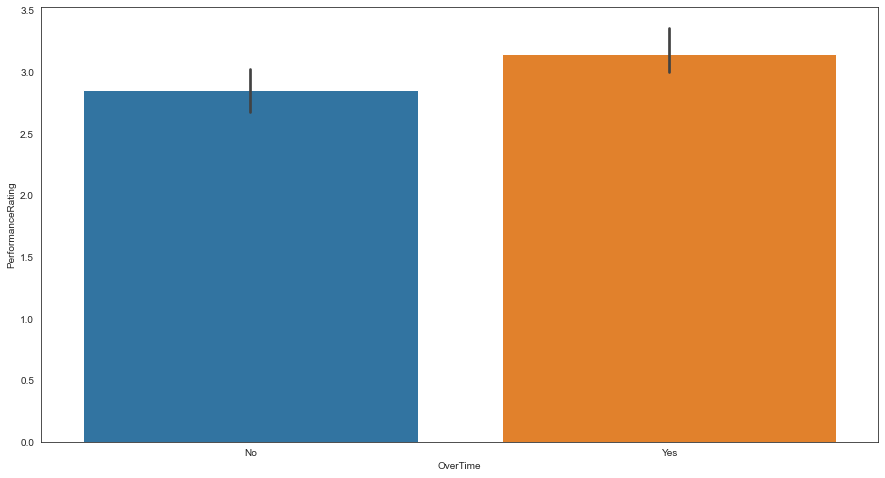

In [106]:
plt.figure(figsize=(15,8))
sns.barplot(y=HR.PerformanceRating,x=HR.OverTime)

In [107]:
HR.OverTime.value_counts()

No     40
Yes    14
Name: OverTime, dtype: int64

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='PerformanceRating'>

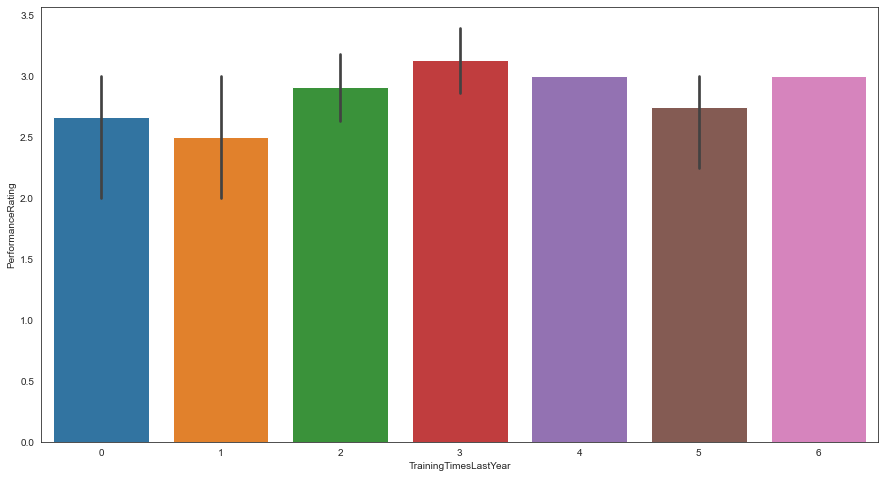

In [110]:
plt.figure(figsize=(15,8))
sns.barplot(y=HR.PerformanceRating,x=HR.TrainingTimesLastYear)

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='PerformanceRating'>

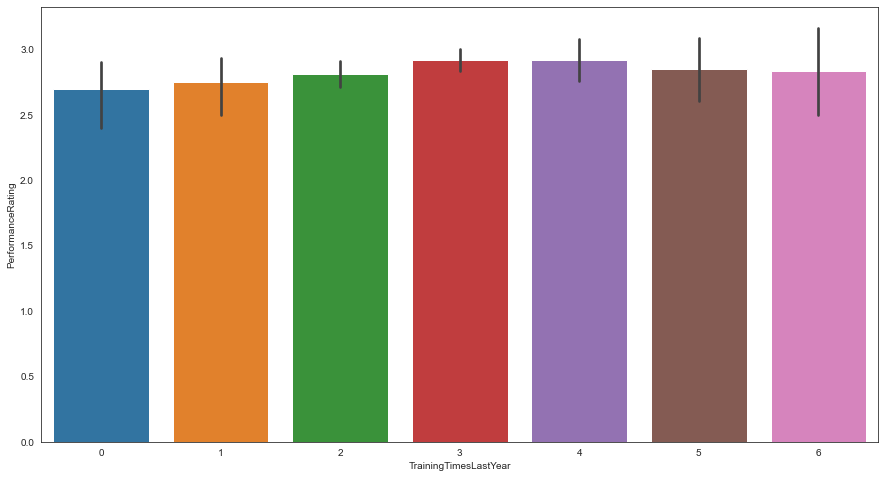

In [111]:
plt.figure(figsize=(15,8))
sns.barplot(y=sales.PerformanceRating,x=sales.TrainingTimesLastYear)

<AxesSubplot:xlabel='EmpHourlyRate', ylabel='PerformanceRating'>

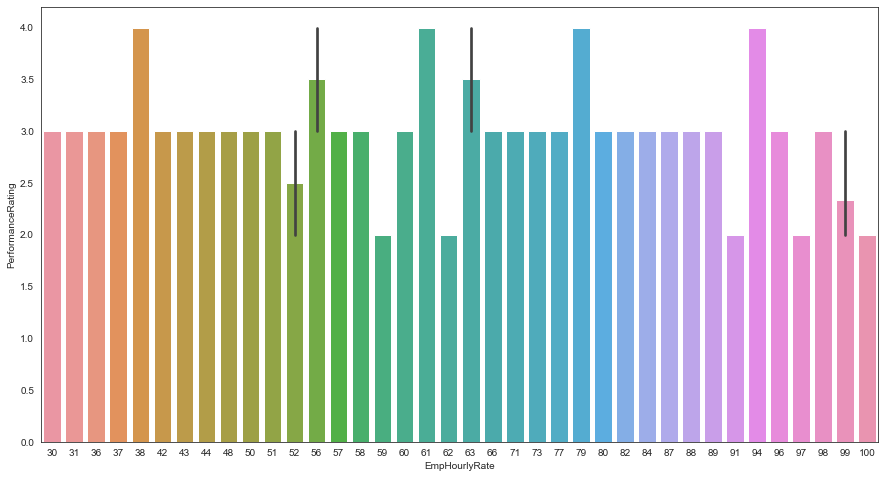

In [112]:
plt.figure(figsize=(15,8))
sns.barplot(y=HR.PerformanceRating,x=HR.EmpHourlyRate)

<AxesSubplot:xlabel='EmpHourlyRate', ylabel='EmpJobInvolvement'>

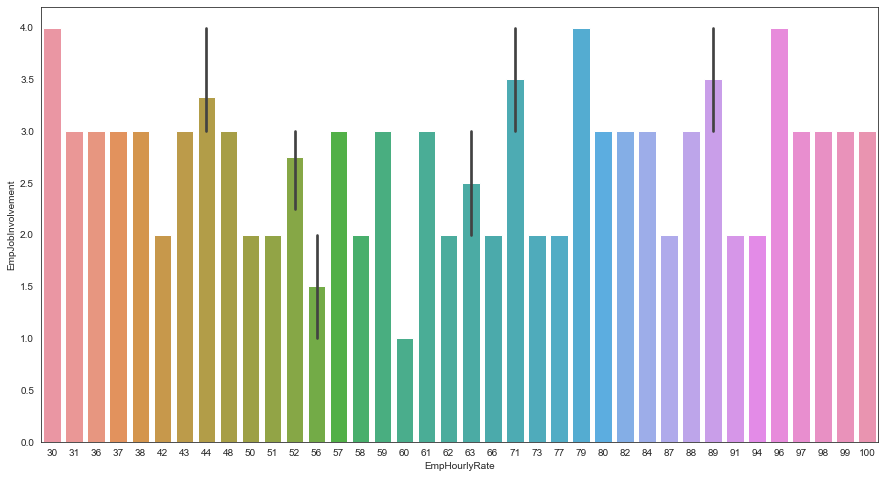

In [113]:
plt.figure(figsize=(15,8))
sns.barplot(y=HR.EmpJobInvolvement,x=HR.EmpHourlyRate)

<AxesSubplot:xlabel='TotalWorkExperienceInYears', ylabel='PerformanceRating'>

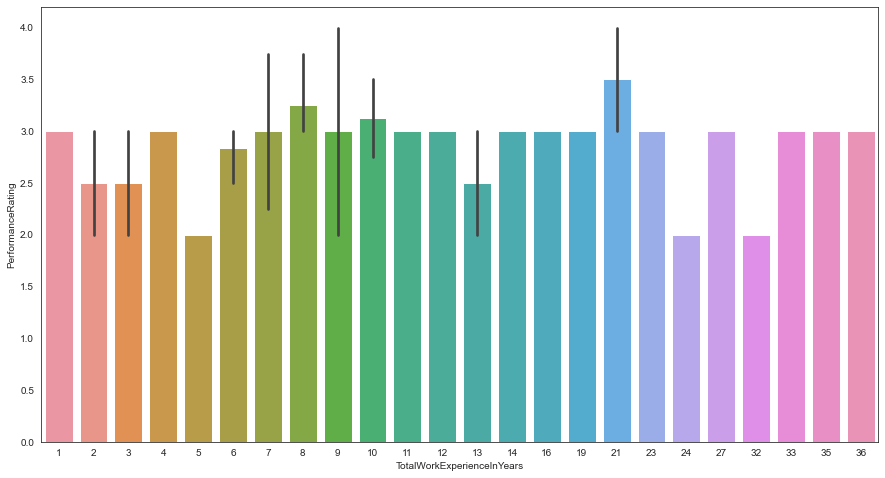

In [118]:
plt.figure(figsize=(15,8))
sns.barplot(y=HR.PerformanceRating,x=HR.TotalWorkExperienceInYears)

# Data Science

<AxesSubplot:xlabel='EmpWorkLifeBalance', ylabel='PerformanceRating'>

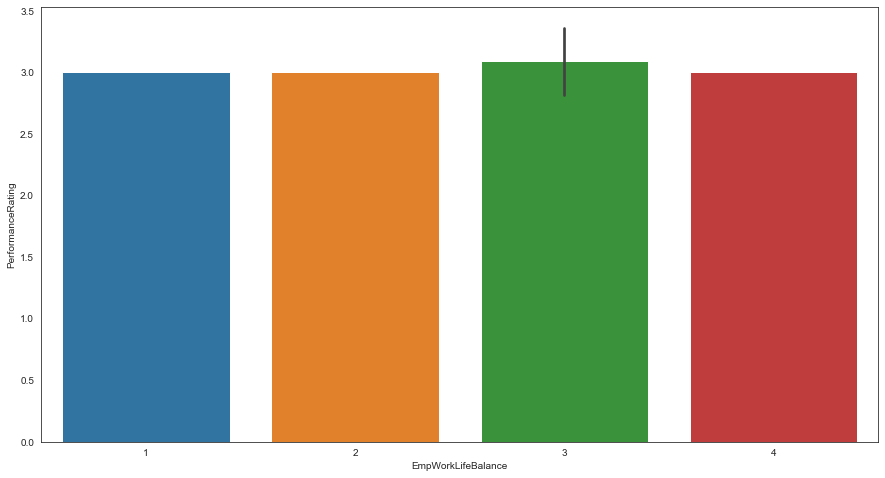

In [119]:
plt.figure(figsize=(15,8))
sns.barplot(y=DataScience.PerformanceRating,x=DataScience.EmpWorkLifeBalance)

In [120]:
DataScience.shape

(20, 27)

In [121]:
DataScience

Age  Gender EducationBackground MaritalStatus EmpDepartment  \
89     49  Female    Technical Degree       Married  Data Science   
107    21  Female               Other        Single  Data Science   
108    36    Male       Life Sciences       Married  Data Science   
120    48    Male             Medical       Married  Data Science   
942    51    Male       Life Sciences       Married  Data Science   
964    39  Female             Medical      Divorced  Data Science   
966    41    Male       Life Sciences      Divorced  Data Science   
978    40    Male             Medical      Divorced  Data Science   
986    31    Male             Medical       Married  Data Science   
996    26  Female       Life Sciences      Divorced  Data Science   
1004   26    Male             Medical      Divorced  Data Science   
1017   28    Male             Medical        Single  Data Science   
1039   47    Male       Life Sciences       Married  Data Science   
1071   27    Male             Medical      Divorced  Data Science   
1101   52  Female       Life Sciences       Married  Data Science   
1105   46  Female             Medical      Divorced  Data Science   
1108   38    Male       Life Sciences       Married  Data Science   
1131   42    Male               Other       Married  Data Science   
1154   38  Female             Medical       Married  Data Science   
1198   34  Female             Medical        Single  Data Science   

          EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
89    Data Scientist           Travel_Rarely                 1   
107   Data Scientist           Travel_Rarely                18   
108   Data Scientist           Travel_Rarely                14   
120   Data Scientist           Travel_Rarely                20   
942   Data Scientist           Travel_Rarely                 8   
964   Data Scientist           Travel_Rarely                 1   
966   Data Scientist           Travel_Rarely                19   
978   Data Scientist           Travel_Rarely                 2   
986   Data Scientist           Travel_Rarely                23   
996   Data Scientist       Travel_Frequently                 1   
1004  Data Scientist           Travel_Rarely                16   
1017  Data Scientist           Travel_Rarely                16   
1039  Data Scientist           Travel_Rarely                 5   
1071  Data Scientist           Travel_Rarely                 1   
1101  Data Scientist           Travel_Rarely                 4   
1105  Data Scientist           Travel_Rarely                18   
1108  Data Scientist       Travel_Frequently                 2   
1131  Data Scientist       Travel_Frequently                 5   
1154  Data Scientist           Travel_Rarely                10   
1198  Data Scientist           Travel_Rarely                 9   

      EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
89                    3                           3  ...   
107                   1                           4  ...   
108                   1                           3  ...   
120                   4                           4  ...   
942                   4                           2  ...   
964                   4                           3  ...   
966                   2                           3  ...   
978                   2                           1  ...   
986                   3                           2  ...   
996                   3                           3  ...   
1004                  4                           1  ...   
1017                  2                           2  ...   
1039                  5                           4  ...   
1071                  2                           4  ...   
1101                  2                           4  ...   
1105                  3                           3  ...   
1108                  2                           4  ...   
1131                  2                           2  ...   
1154                  3      

<AxesSubplot:xlabel='Gender', ylabel='PerformanceRating'>

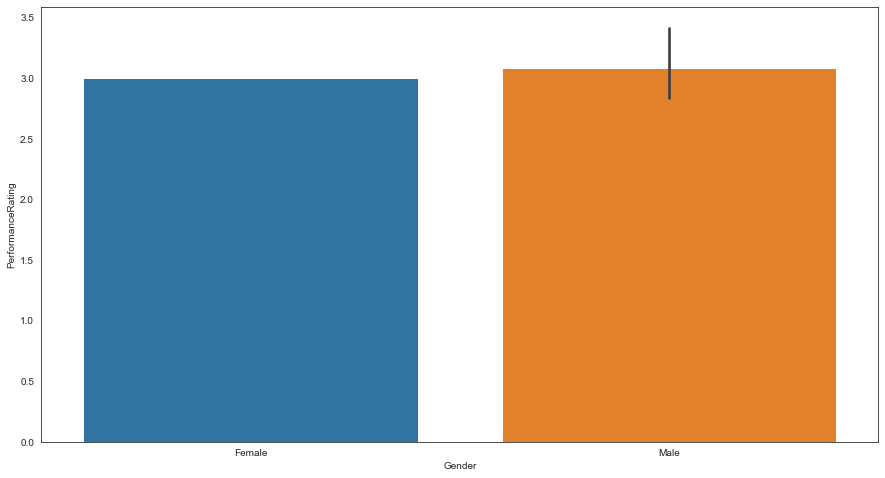

In [122]:
plt.figure(figsize=(15,8))
sns.barplot(y=DataScience.PerformanceRating,x=DataScience.Gender)

<AxesSubplot:xlabel='EmpJobSatisfaction', ylabel='PerformanceRating'>

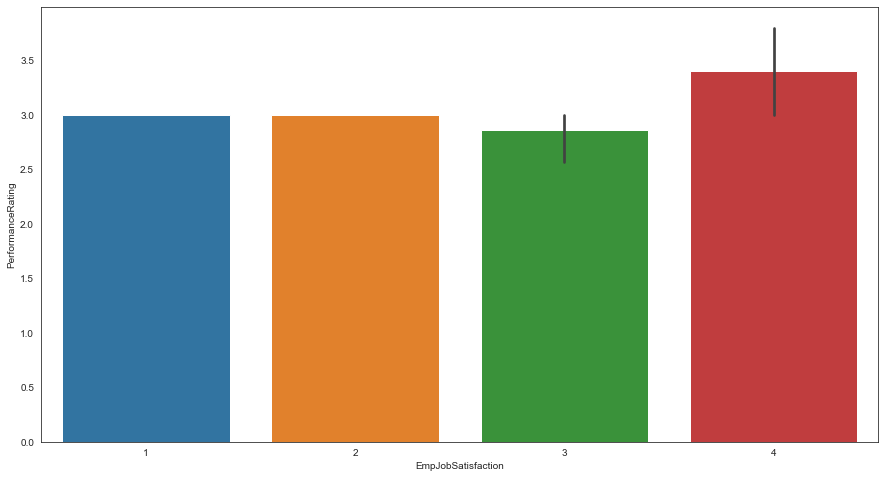

In [124]:
plt.figure(figsize=(15,8))
sns.barplot(y=DataScience.PerformanceRating,x=DataScience.EmpJobSatisfaction)

<AxesSubplot:xlabel='EmpWorkLifeBalance', ylabel='PerformanceRating'>

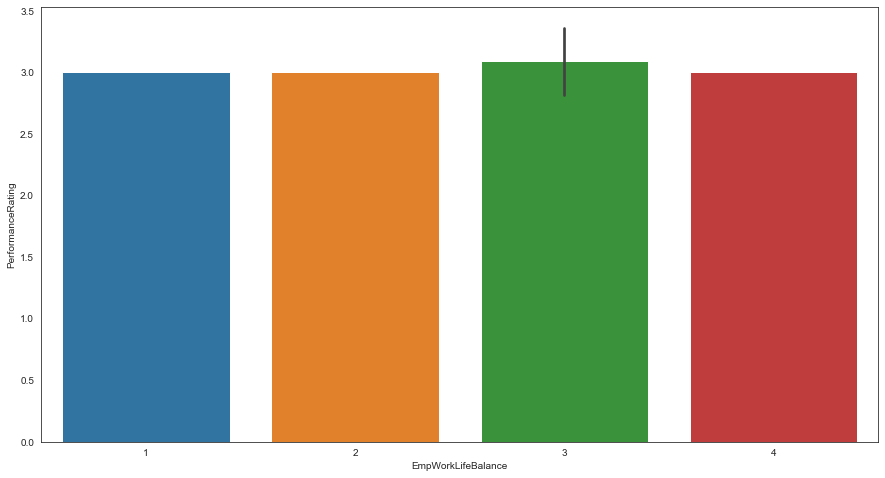

In [126]:
plt.figure(figsize=(15,8))
sns.barplot(y=DataScience.PerformanceRating,x=DataScience.EmpWorkLifeBalance)

<AxesSubplot:xlabel='ExperienceYearsInCurrentRole', ylabel='PerformanceRating'>

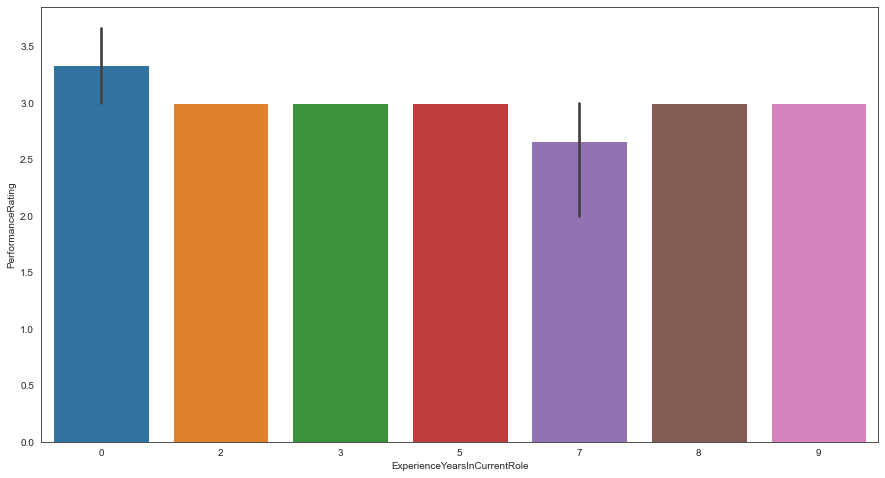

In [128]:
plt.figure(figsize=(15,8))
sns.barplot(y=DataScience.PerformanceRating,x=DataScience.ExperienceYearsInCurrentRole)

# Research and Development

In [129]:
RD

Age  Gender EducationBackground MaritalStatus           EmpDepartment  \
156   38    Male             Medical       Married  Research & Development   
157   35    Male               Other      Divorced  Research & Development   
158   31  Female       Life Sciences       Married  Research & Development   
159   18    Male       Life Sciences        Single  Research & Development   
160   54  Female    Technical Degree       Married  Research & Development   
..   ...     ...                 ...           ...                     ...   
756   29  Female             Medical        Single  Research & Development   
759   31    Male             Medical        Single  Research & Development   
761   39    Male             Medical       Married  Research & Development   
762   27    Male       Life Sciences       Married  Research & Development   
764   34    Male             Medical       Married  Research & Development   

                    EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
156         Senior Manager R&D       Travel_Frequently                10   
157      Laboratory Technician           Travel_Rarely                14   
158     Manufacturing Director       Travel_Frequently                 1   
159         Research Scientist              Non-Travel                 5   
160         Senior Manager R&D           Travel_Rarely                17   
..                         ...                     ...               ...   
756         Research Scientist           Travel_Rarely                28   
759     Manufacturing Director              Non-Travel                 5   
761  Healthcare Representative           Travel_Rarely                 6   
762     Manufacturing Director           Travel_Rarely                 4   
764      Laboratory Technician           Travel_Rarely                 8   

     EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
156                  1                           3  ...   
157                  4                           3  ...   
158                  1                           3  ...   
159                  2                           2  ...   
160                  3                           3  ...   
..                 ...                         ...  ...   
756                  4                           4  ...   
759                  3                           2  ...   
761                  1                           4  ...   
762                  3                           2  ...   
764                  3                           2  ...   

     EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
156                            2                           3   
157                            4                           5   
158                            3                           4   
159                            4                           0   
160                            3                          22   
..                           ...                         ...   
756                            2                           5   
759                            2                          10   
761                            1                           9   
762                            2                           6   
764                            1                           6   

     TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
156                      0                   2                             2   
157                      2                   1                             4   
158                      1                   3                             4   
159                      2                   3                             0   
160                      2                   3                            10   
..                     ...                 ...                           ...   
756                      3                   1                             5   
759                      2           

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

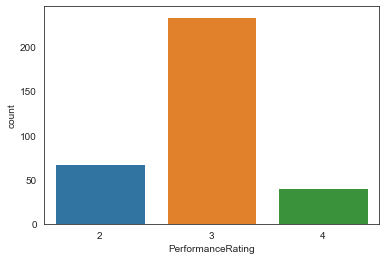

In [130]:
sns.countplot(RD.PerformanceRating)

<AxesSubplot:xlabel='ExperienceYearsInCurrentRole', ylabel='PerformanceRating'>

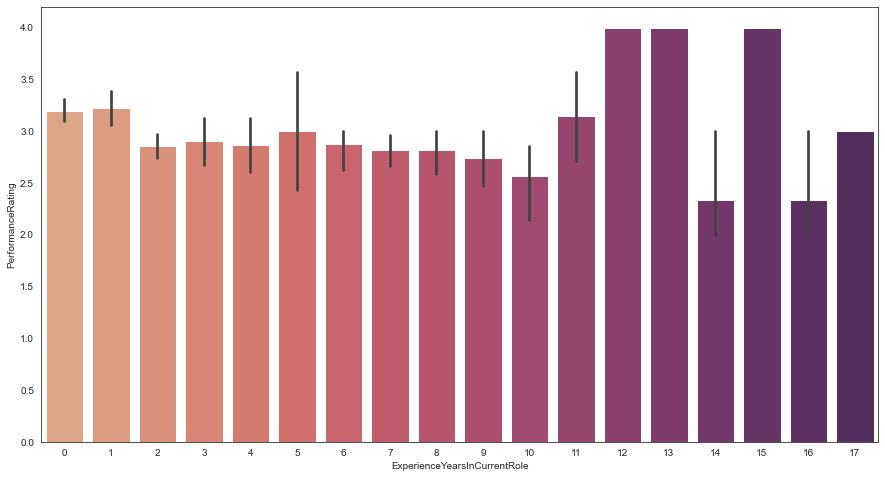

In [136]:
plt.figure(figsize=(15,8))
sns.barplot(y=RD.PerformanceRating,x=RD.ExperienceYearsInCurrentRole,palette='flare')

<AxesSubplot:xlabel='EmpHourlyRate', ylabel='PerformanceRating'>

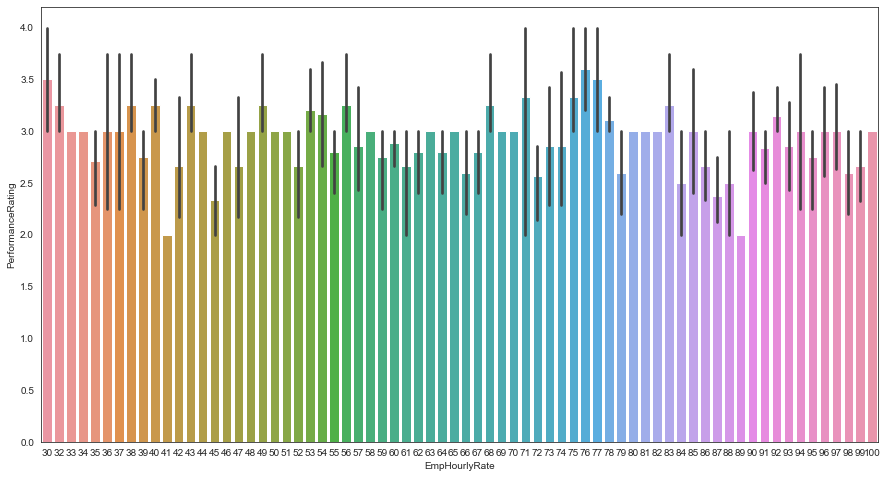

In [137]:
plt.figure(figsize=(15,8))
sns.barplot(y=RD.PerformanceRating,x=RD.EmpHourlyRate)

<AxesSubplot:xlabel='EmpJobSatisfaction', ylabel='PerformanceRating'>

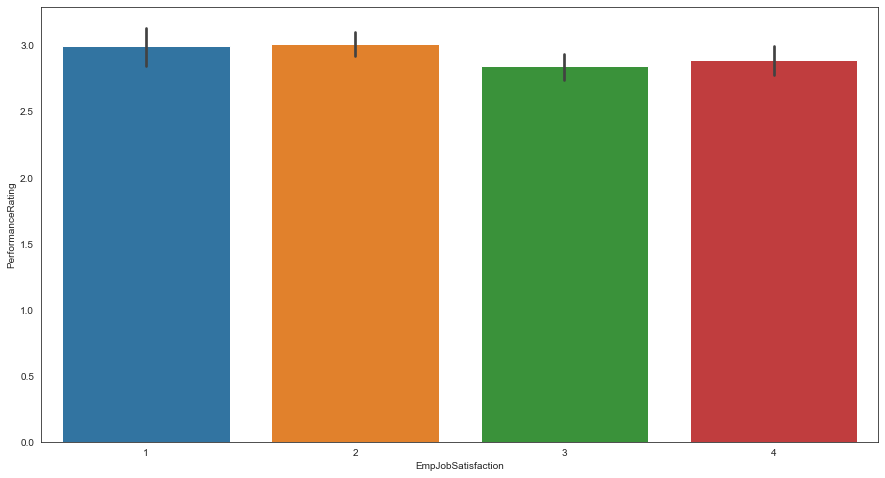

In [139]:
plt.figure(figsize=(15,8))
sns.barplot(y=RD.PerformanceRating,x=RD.EmpJobSatisfaction)

<AxesSubplot:xlabel='BusinessTravelFrequency', ylabel='PerformanceRating'>

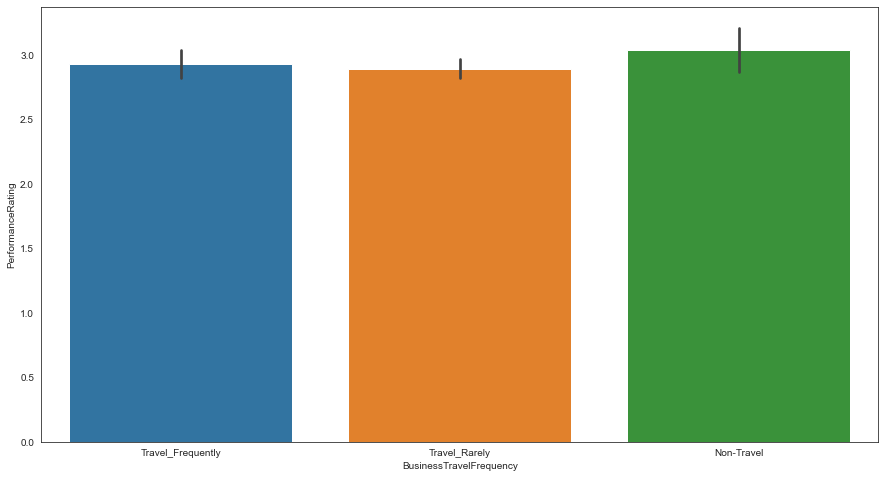

In [140]:
plt.figure(figsize=(15,8))
sns.barplot(y=RD.PerformanceRating,x=RD.BusinessTravelFrequency)

<AxesSubplot:xlabel='MaritalStatus', ylabel='PerformanceRating'>

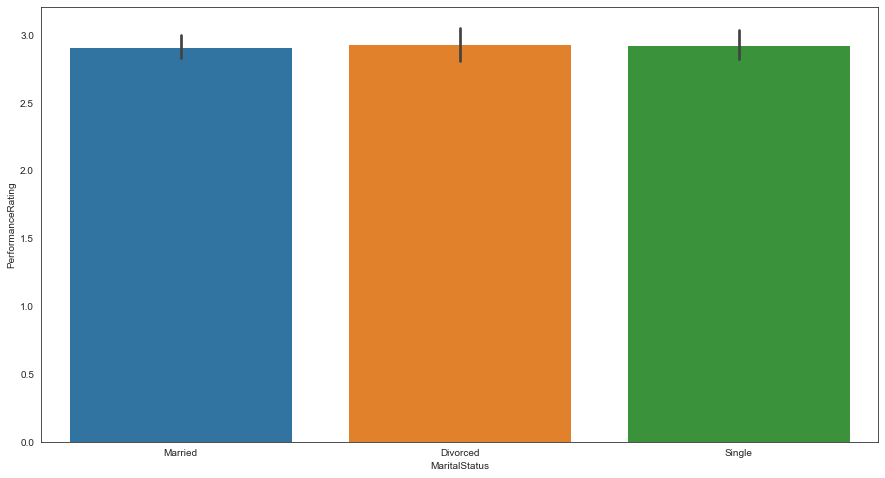

In [141]:
plt.figure(figsize=(15,8))
sns.barplot(y=RD.PerformanceRating,x=RD.MaritalStatus)

<AxesSubplot:xlabel='EmpJobRole', ylabel='PerformanceRating'>

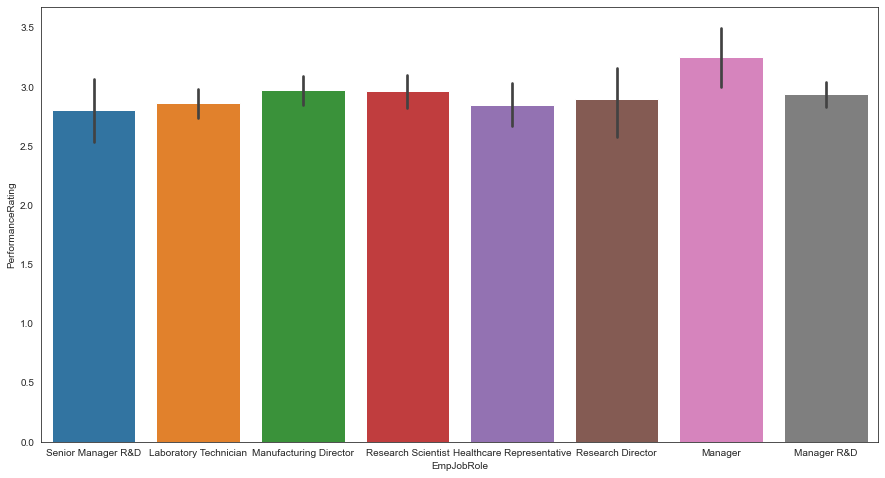

In [142]:
plt.figure(figsize=(15,8))
sns.barplot(y=RD.PerformanceRating,x=RD.EmpJobRole)

<AxesSubplot:xlabel='OverTime', ylabel='PerformanceRating'>

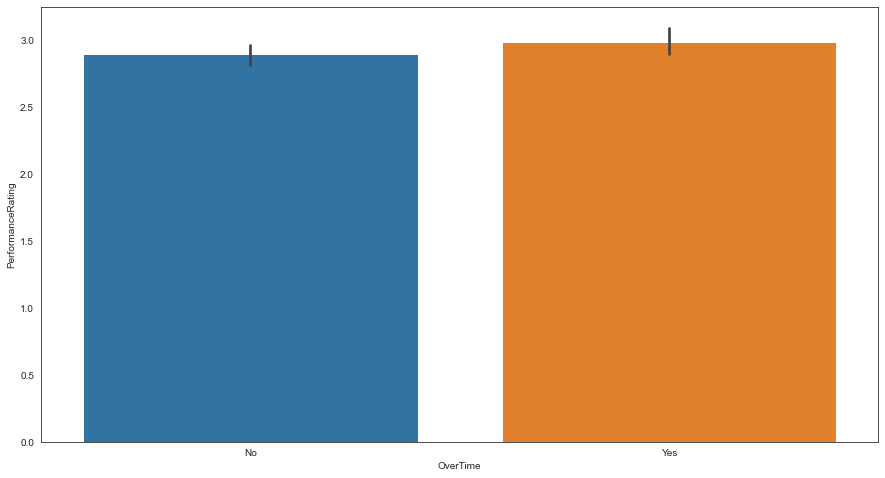

In [143]:
plt.figure(figsize=(15,8))
sns.barplot(y=RD.PerformanceRating,x=RD.OverTime)

<AxesSubplot:xlabel='EmpEnvironmentSatisfaction', ylabel='PerformanceRating'>

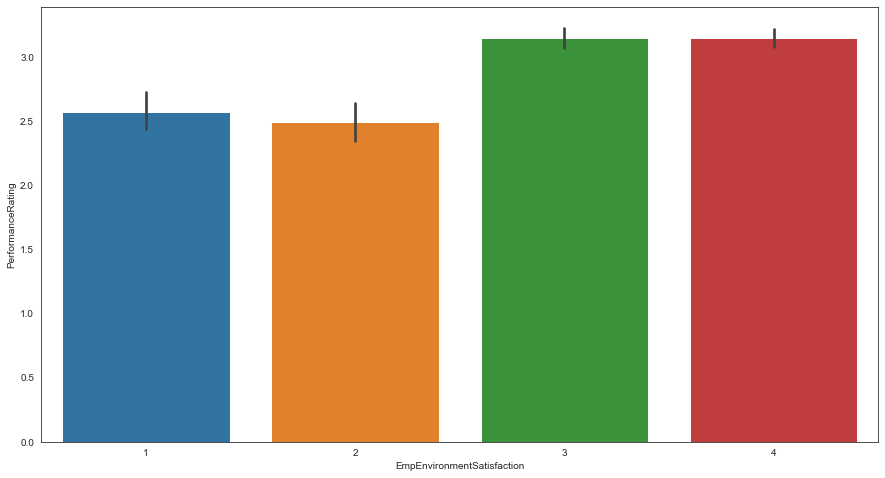

In [144]:
plt.figure(figsize=(15,8))
sns.barplot(y=RD.PerformanceRating,x=RD.EmpEnvironmentSatisfaction)

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='PerformanceRating'>

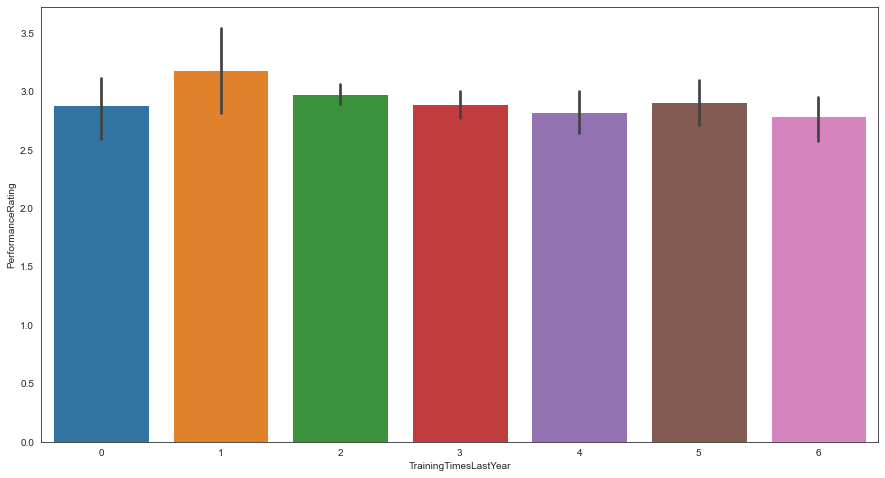

In [147]:
plt.figure(figsize=(15,8))
sns.barplot(y=RD.PerformanceRating,x=RD.TrainingTimesLastYear)

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='PerformanceRating'>

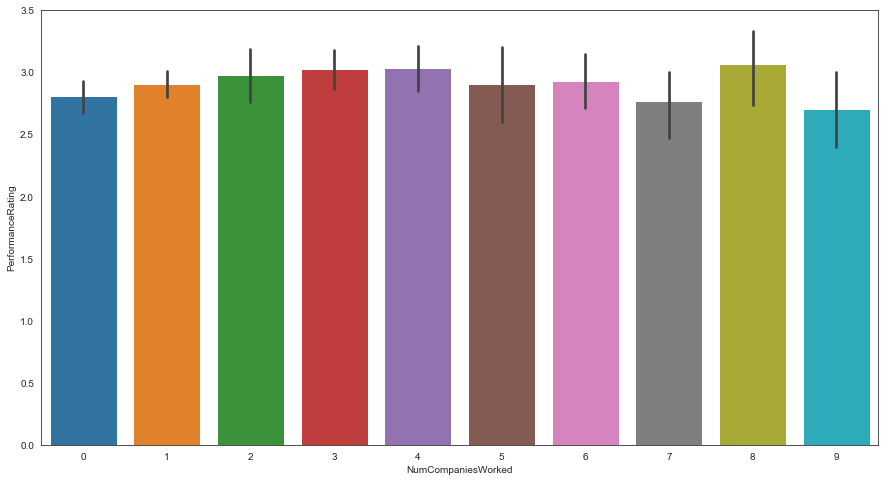

In [148]:
plt.figure(figsize=(15,8))
sns.barplot(y=RD.PerformanceRating,x=RD.NumCompaniesWorked)

# Development

In [131]:
Development.shape

(361, 27)

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

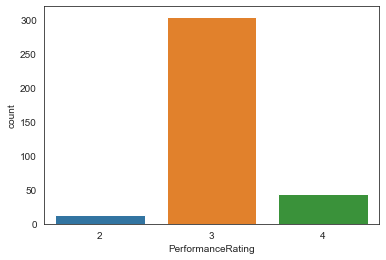

In [134]:
sns.countplot(Development.PerformanceRating)

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='PerformanceRating'>

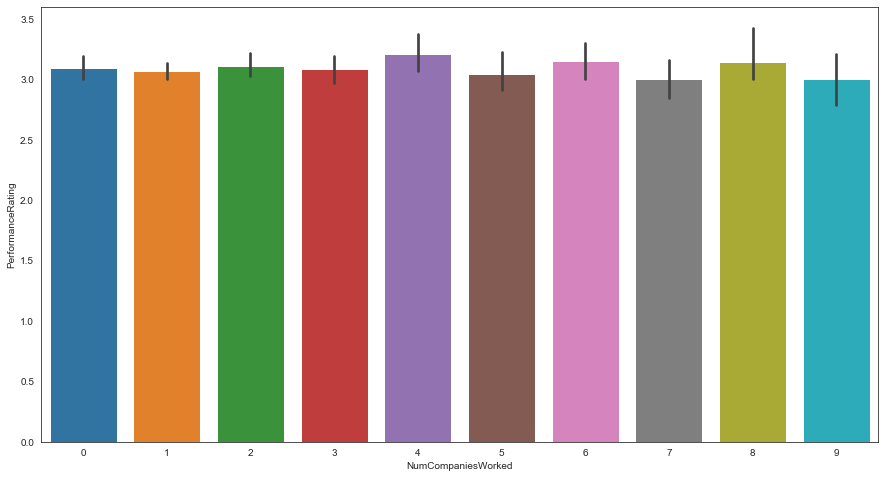

In [149]:
plt.figure(figsize=(15,8))
sns.barplot(y=Development.PerformanceRating,x=Development.NumCompaniesWorked)

<AxesSubplot:xlabel='EmpJobSatisfaction', ylabel='PerformanceRating'>

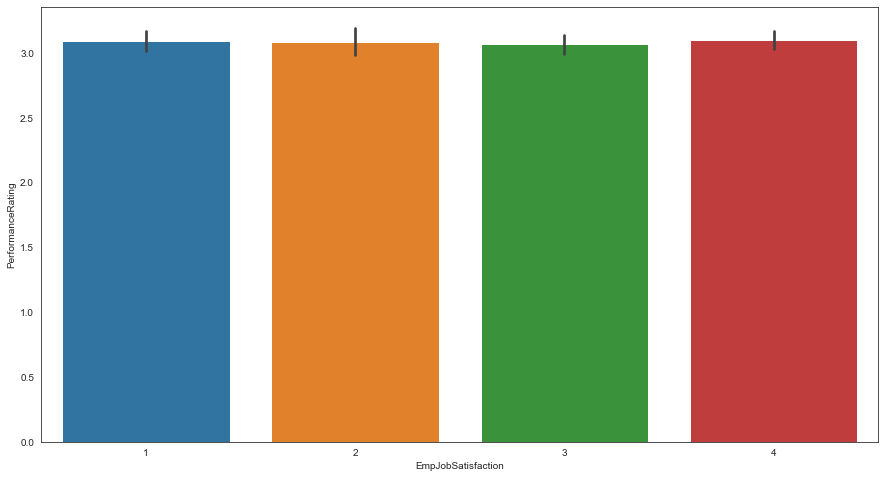

In [150]:
plt.figure(figsize=(15,8))
sns.barplot(y=Development.PerformanceRating,x=Development.EmpJobSatisfaction)

<AxesSubplot:xlabel='Gender', ylabel='PerformanceRating'>

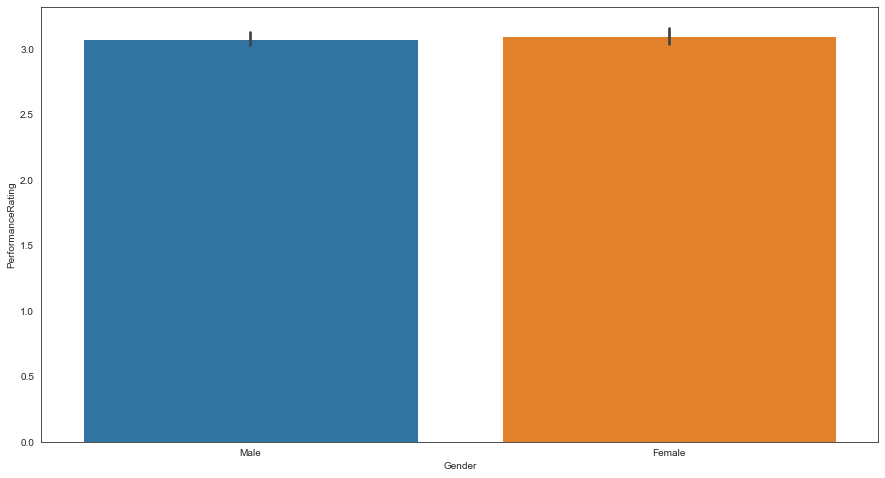

In [151]:
plt.figure(figsize=(15,8))
sns.barplot(y=Development.PerformanceRating,x=Development.Gender)

<AxesSubplot:xlabel='EducationBackground', ylabel='PerformanceRating'>

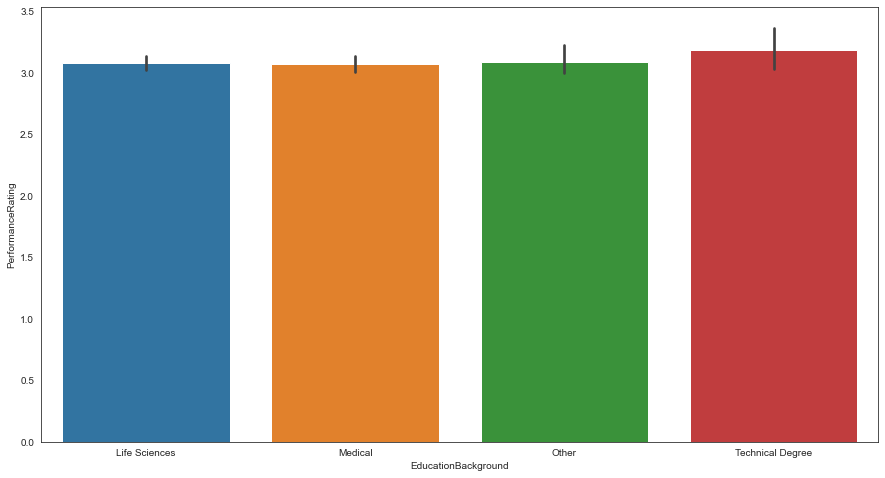

In [152]:
plt.figure(figsize=(15,8))
sns.barplot(y=Development.PerformanceRating,x=Development.EducationBackground)

<AxesSubplot:xlabel='EmpEducationLevel', ylabel='PerformanceRating'>

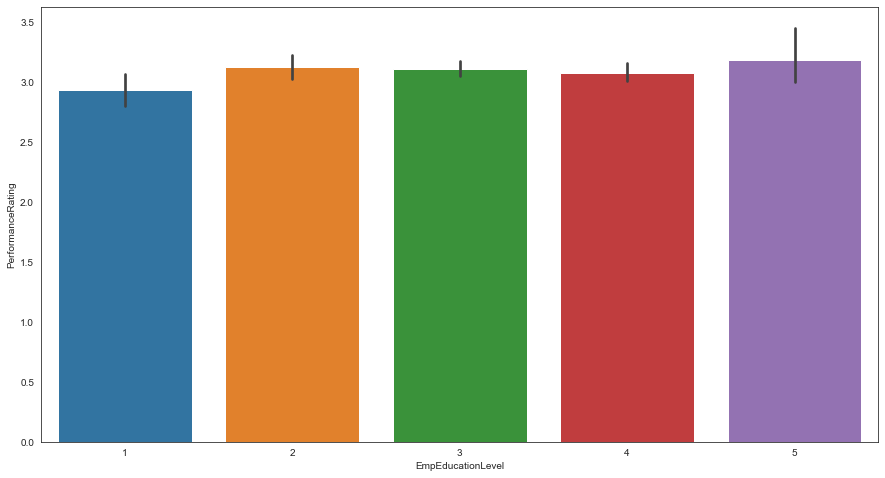

In [153]:
plt.figure(figsize=(15,8))
sns.barplot(y=Development.PerformanceRating,x=Development.EmpEducationLevel)

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='EmpJobSatisfaction'>

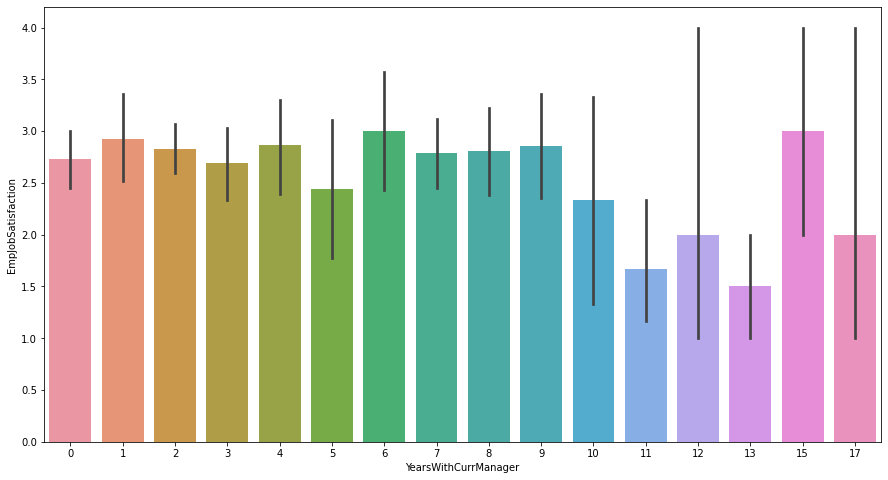

In [10]:
plt.figure(figsize=(15,8))
sns.barplot(y=Development.EmpJobSatisfaction,x=Development.YearsWithCurrManager)

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='EmpEnvironmentSatisfaction'>

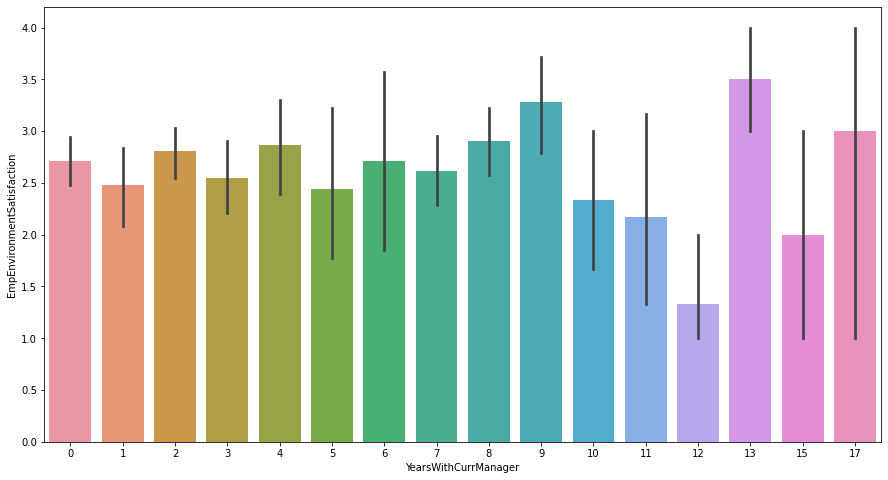

In [11]:
plt.figure(figsize=(15,8))
sns.barplot(y=Development.EmpEnvironmentSatisfaction,x=Development.YearsWithCurrManager)

In [15]:
df3 = Development[Development.YearsWithCurrManager==12]
df3

Age  Gender EducationBackground MaritalStatus EmpDepartment EmpJobRole  \
41     38  Female       Life Sciences        Single   Development  Developer   
809    33  Female       Life Sciences        Single   Development  Developer   
1089   31  Female             Medical       Married   Development  Developer   

     BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
41         Travel_Frequently                 2                  4   
809        Travel_Frequently                 1                  2   
1089           Travel_Rarely                 7                  2   

      EmpEnvironmentSatisfaction  ...  EmpRelationshipSatisfaction  \
41                             1  ...                            4   
809                            1  ...                            3   
1089                           2  ...                            2   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
41                            17                      2                   3   
809                           15                      1                   3   
1089                          13                      5                   1   

      ExperienceYearsAtThisCompany ExperienceYearsInCurrentRole  \
41                              15                            7   
809                             15                           14   
1089                            13                           10   

      YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
41                          4                    12         No   
809                         8                    12         No   
1089                        3                    12         No   

      PerformanceRating  
41                    3  
809                   2  
1089                  3  

[3 rows x 27 columns]

In [17]:
df4 = Development[Development.PerformanceRating ==2]
pd.options.display.max_columns=28
df4

Age  Gender EducationBackground MaritalStatus EmpDepartment  \
766    27    Male             Medical       Married   Development   
772    31    Male       Life Sciences      Divorced   Development   
773    34    Male             Medical      Divorced   Development   
775    29  Female       Life Sciences      Divorced   Development   
809    33  Female       Life Sciences        Single   Development   
967    31    Male             Medical      Divorced   Development   
997    50    Male       Life Sciences      Divorced   Development   
1009   37    Male             Medical       Married   Development   
1086   43    Male       Life Sciences      Divorced   Development   
1094   39    Male       Life Sciences      Divorced   Development   
1125   33    Male             Medical       Married   Development   
1151   46  Female             Medical       Married   Development   
1162   24  Female       Life Sciences       Married   Development   

            EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
766          Developer           Travel_Rarely                 2   
772          Developer           Travel_Rarely                26   
773   Senior Developer           Travel_Rarely                19   
775   Senior Developer           Travel_Rarely                21   
809          Developer       Travel_Frequently                 1   
967     Technical Lead       Travel_Frequently                 3   
997          Developer           Travel_Rarely                 4   
1009         Developer       Travel_Frequently                 9   
1086         Developer           Travel_Rarely                12   
1094  Senior Developer       Travel_Frequently                 1   
1125  Senior Developer           Travel_Rarely                15   
1151  Senior Developer       Travel_Frequently                18   
1162  Senior Developer       Travel_Frequently                 7   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
766                   1                           1             40   
772                   1                           1             31   
773                   2                           2             93   
775                   4                           2             51   
809                   2                           1             98   
967                   4                           2             73   
997                   1                           1             96   
1009                  3                           2             53   
1086                  3                           1             59   
1094                  1                           2             52   
1125                  1                           2             56   
1151                  1                           1             86   
1162                  3                           1             55   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
766                   3            1                   2                   9   
772                   3            1                   3                   1   
773                   3            1                   4                   0   
775                   4            3                   1                   1   
809                   3            3                   4                   1   
967                   3            3                   3                   9   
997                   3            5                   2                   3   
1009                  3            1                   4                   1   
1086                  2            4                   2                   1   
1094                  3            5                   3                   1   
1125                  3            3                   3                   7   
1151                  3            3                   3                   5   
1162                  3            1                   3         

<AxesSubplot:xlabel='EmpJobSatisfaction', ylabel='PerformanceRating'>

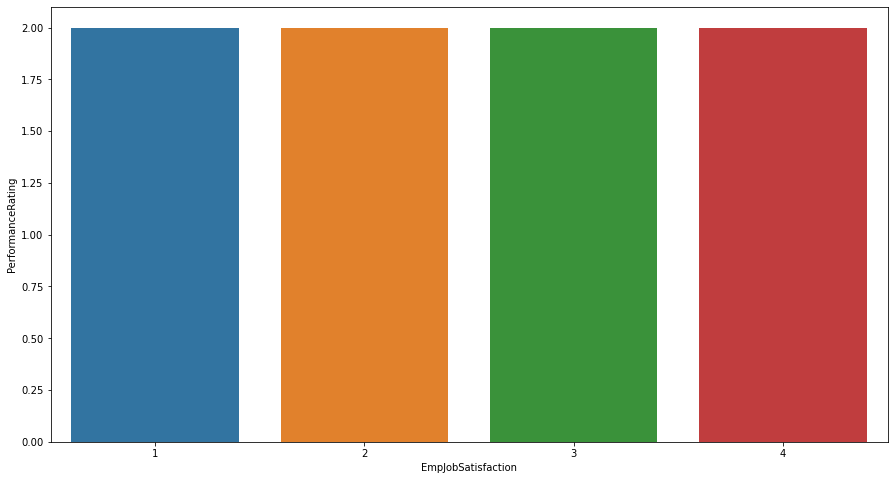

In [18]:
plt.figure(figsize=(15,8))
sns.barplot(y=df4.PerformanceRating,x=df4.EmpJobSatisfaction)

<AxesSubplot:xlabel='EducationBackground', ylabel='PerformanceRating'>

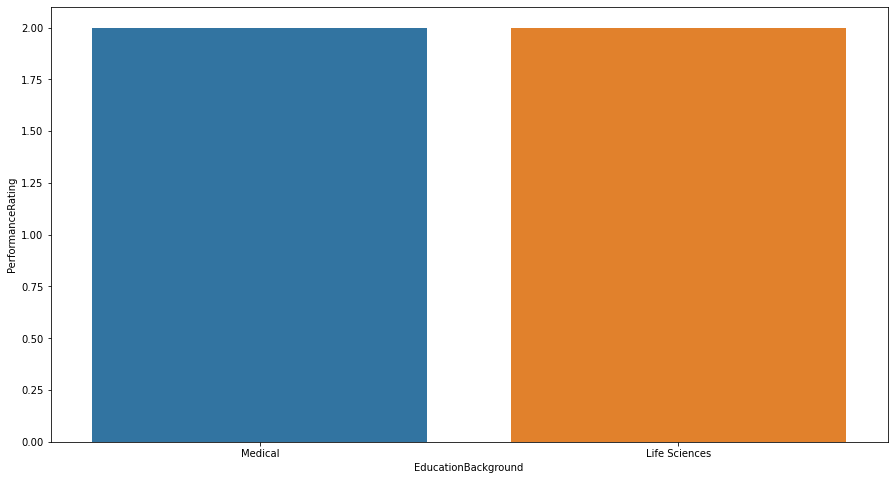

In [20]:
plt.figure(figsize=(15,8))
sns.barplot(y=df4.PerformanceRating,x=df4.EducationBackground)

<AxesSubplot:xlabel='EducationBackground', ylabel='PerformanceRating'>

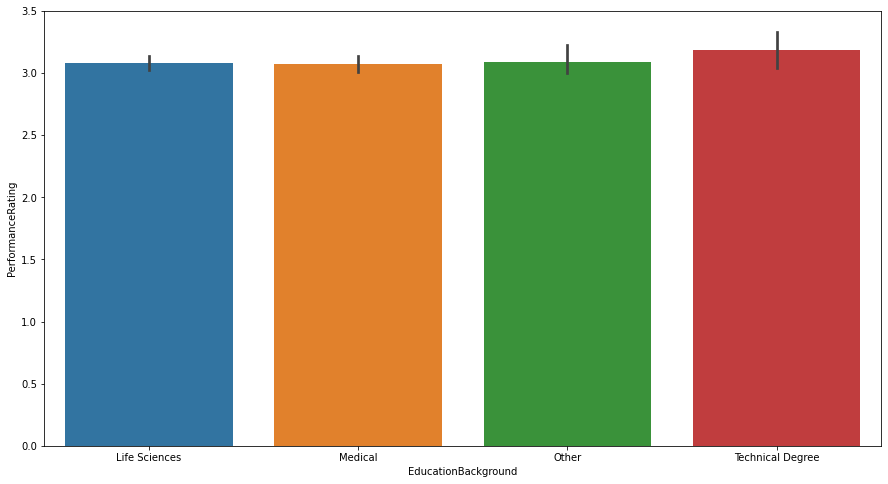

In [21]:
plt.figure(figsize=(15,8))
sns.barplot(y=Development.PerformanceRating,x=Development.EducationBackground)

In [22]:
Development.EducationBackground.value_counts()

Life Sciences       173
Medical             139
Technical Degree     27
Other                22
Name: EducationBackground, dtype: int64

# Finance

In [23]:
Finance.shape

(49, 27)

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

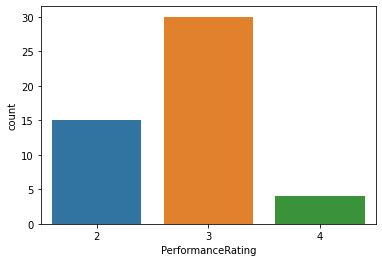

In [24]:
sns.countplot(Finance.PerformanceRating)

In [26]:
fin = Finance[Finance.PerformanceRating==2]
fin

Age  Gender EducationBackground MaritalStatus EmpDepartment  \
482   29    Male       Life Sciences      Divorced       Finance   
485   35    Male       Life Sciences       Married       Finance   
489   22  Female               Other       Married       Finance   
490   50    Male             Medical       Married       Finance   
492   44  Female             Medical      Divorced       Finance   
493   30    Male             Medical       Married       Finance   
501   35    Male       Life Sciences       Married       Finance   
509   39  Female             Medical        Single       Finance   
511   37  Female             Medical       Married       Finance   
515   24  Female    Technical Degree        Single       Finance   
520   49  Female               Other       Married       Finance   
524   36    Male       Life Sciences        Single       Finance   
528   54  Female             Medical       Married       Finance   
542   53    Male             Medical       Married       Finance   
546   55    Male    Technical Degree      Divorced       Finance   

          EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
482  Finance Manager       Travel_Frequently                 2   
485  Finance Manager           Travel_Rarely                28   
489  Finance Manager              Non-Travel                26   
490  Finance Manager       Travel_Frequently                20   
492  Finance Manager           Travel_Rarely                 7   
493  Finance Manager           Travel_Rarely                 7   
501  Finance Manager           Travel_Rarely                18   
509  Finance Manager       Travel_Frequently                 4   
511  Finance Manager           Travel_Rarely                10   
515  Finance Manager       Travel_Frequently                 2   
520  Finance Manager           Travel_Rarely                22   
524  Finance Manager           Travel_Rarely                 7   
528  Finance Manager           Travel_Rarely                22   
542  Finance Manager           Travel_Rarely                24   
546  Finance Manager           Travel_Rarely                22   

     EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
482                  1                           1             87   
485                  3                           2             46   
489                  2                           2             85   
490                  5                           2             41   
492                  3                           2             31   
493                  3                           2             48   
501                  5                           2             48   
509                  3                           1             81   
511                  3                           2             71   
515                  1                           1             32   
520                  4                           1             72   
524                  3                           1             77   
528                  5                           2             91   
542                  4                           2             48   
546                  3                           1             94   

     EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
482                  3            2                   4                   1   
485                  4            2                   3                   1   
489                  2            1                   3                   1   
490                  3            4                   3                   2   
492                  3            5                   4                   0   
493                  2            1                   2                   1   
501                  4            2                   1                   1   
509                  3            2                   3                   0   
511                  3            1        

<AxesSubplot:xlabel='EducationBackground', ylabel='PerformanceRating'>

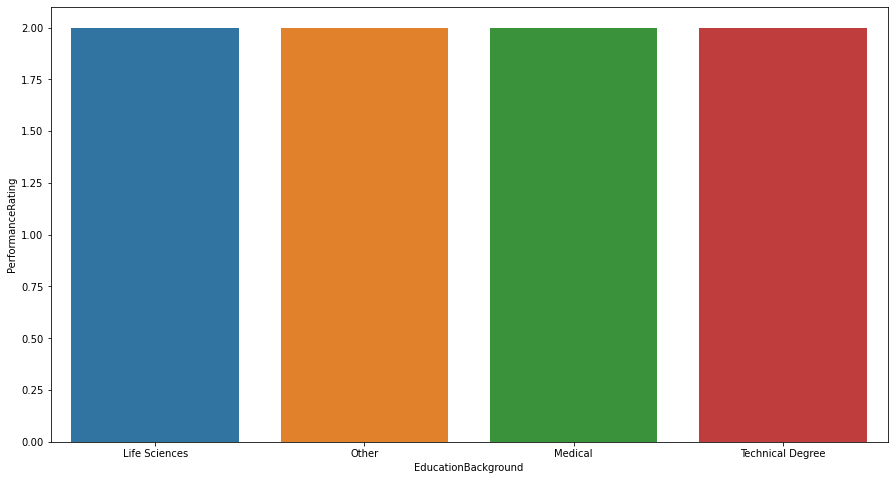

In [29]:
plt.figure(figsize=(15,8))
sns.barplot(y=fin.PerformanceRating,x=fin.EducationBackground)

<AxesSubplot:xlabel='EmpJobSatisfaction', ylabel='PerformanceRating'>

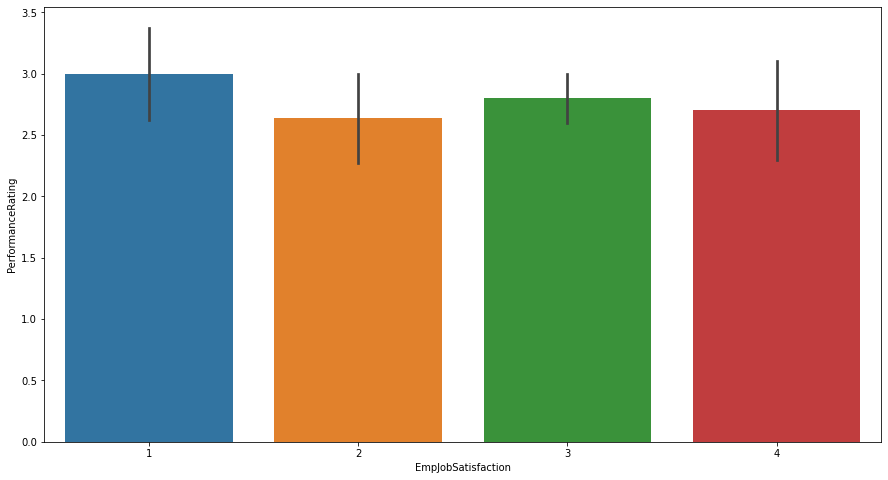

In [30]:
plt.figure(figsize=(15,8))
sns.barplot(y=Finance.PerformanceRating,x=Finance.EmpJobSatisfaction)

<AxesSubplot:xlabel='BusinessTravelFrequency', ylabel='PerformanceRating'>

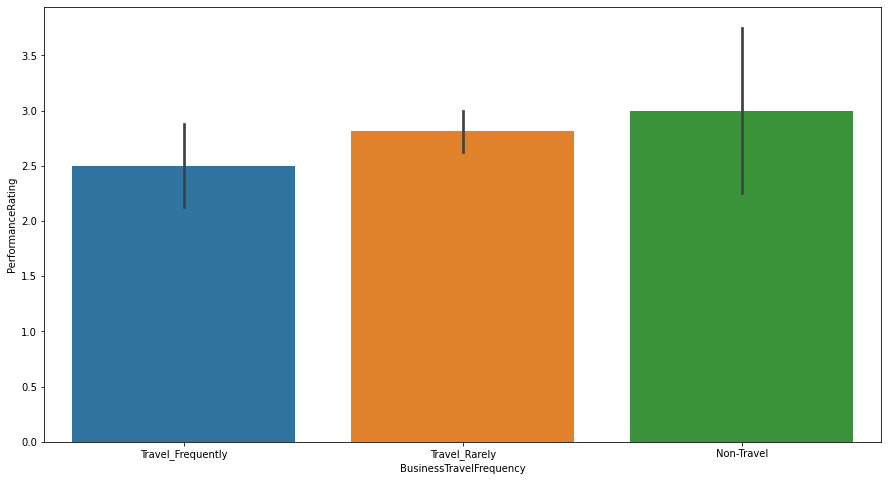

In [32]:
plt.figure(figsize=(15,8))
sns.barplot(y=Finance.PerformanceRating,x=Finance.BusinessTravelFrequency)

<AxesSubplot:xlabel='DistanceFromHome', ylabel='PerformanceRating'>

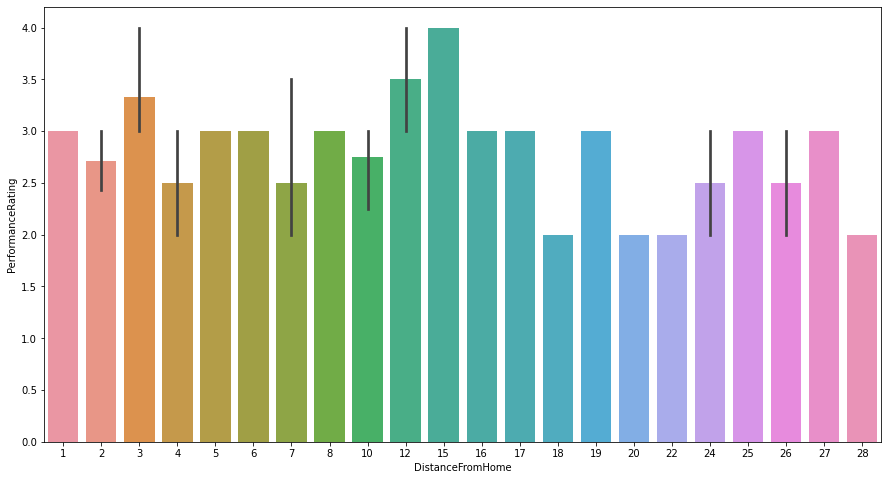

In [33]:
plt.figure(figsize=(15,8))
sns.barplot(y=Finance.PerformanceRating,x=Finance.DistanceFromHome)

<AxesSubplot:xlabel='EmpEducationLevel', ylabel='PerformanceRating'>

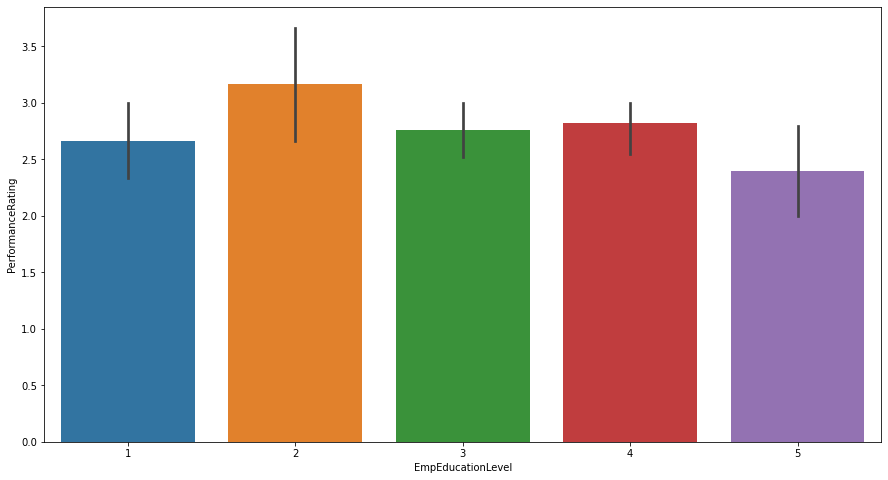

In [34]:
plt.figure(figsize=(15,8))
sns.barplot(y=Finance.PerformanceRating,x=Finance.EmpEducationLevel)

<AxesSubplot:xlabel='EmpLastSalaryHikePercent', ylabel='PerformanceRating'>

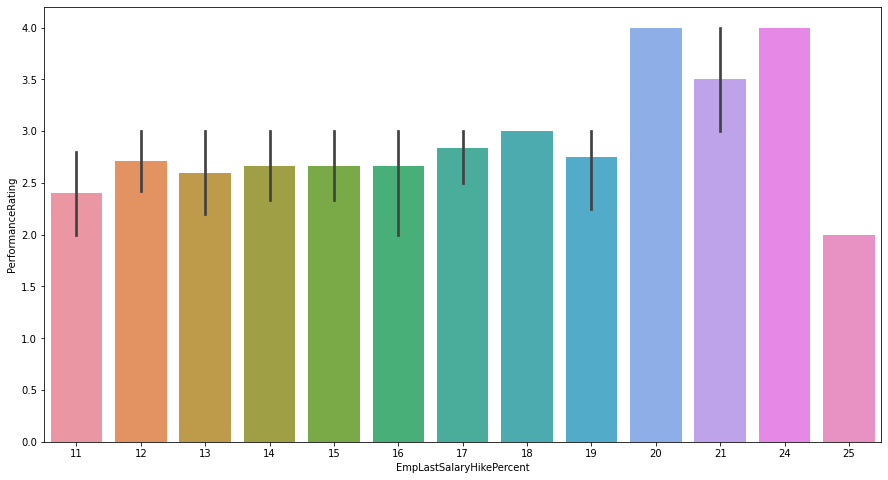

In [35]:
plt.figure(figsize=(15,8))
sns.barplot(y=Finance.PerformanceRating,x=Finance.EmpLastSalaryHikePercent
           )

<AxesSubplot:xlabel='EmpWorkLifeBalance', ylabel='PerformanceRating'>

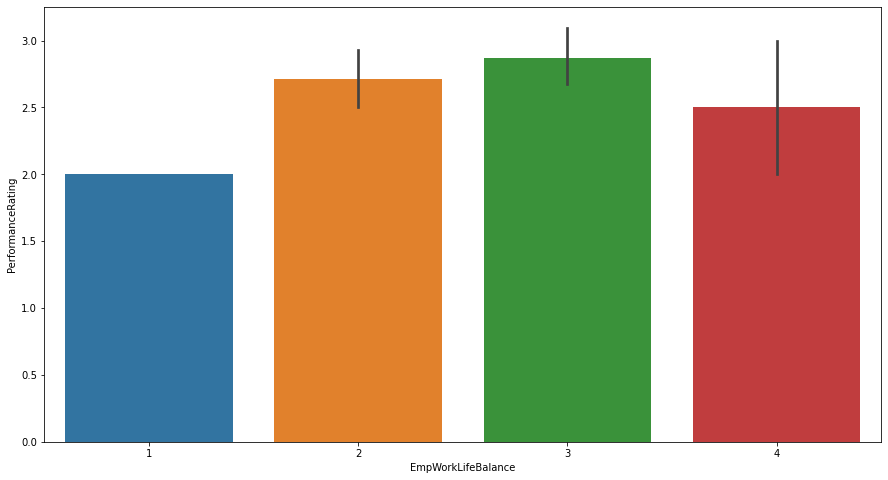

In [36]:
plt.figure(figsize=(15,8))
sns.barplot(y=Finance.PerformanceRating,x=Finance.EmpWorkLifeBalance)

<AxesSubplot:xlabel='EmpWorkLifeBalance', ylabel='PerformanceRating'>

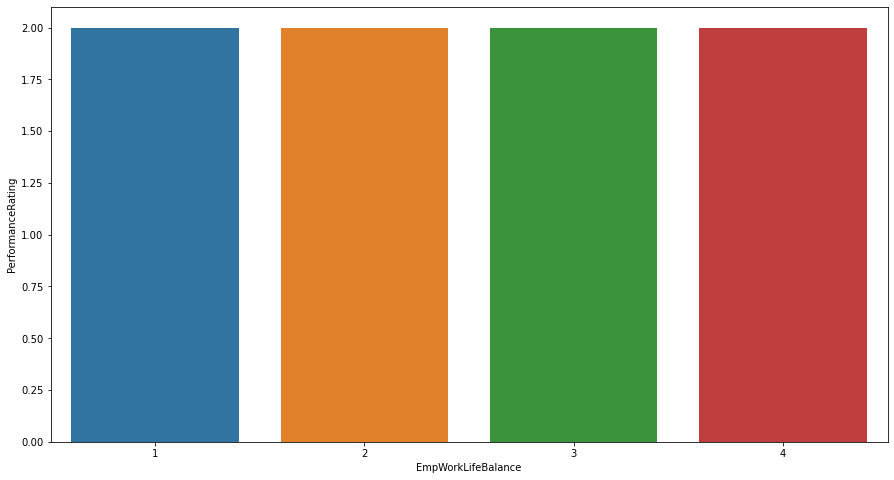

In [37]:
plt.figure(figsize=(15,8))
sns.barplot(y=fin.PerformanceRating,x=fin.EmpWorkLifeBalance)

In [38]:
Finance.EducationBackground.value_counts()

Medical             22
Life Sciences       18
Technical Degree     5
Other                4
Name: EducationBackground, dtype: int64